**Oscilador armónico subamortiguado**

Este es el primer programa desarrollado para el oscilador, el tiempo de ejecución es largo, aprox 1.5 hrs, debido a la arquitectura y a los hiperparámetros.

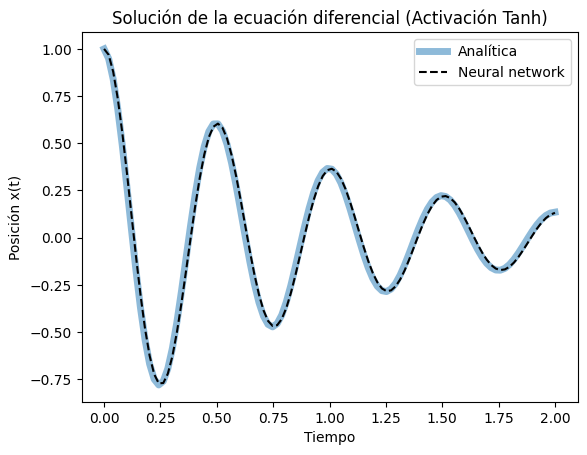

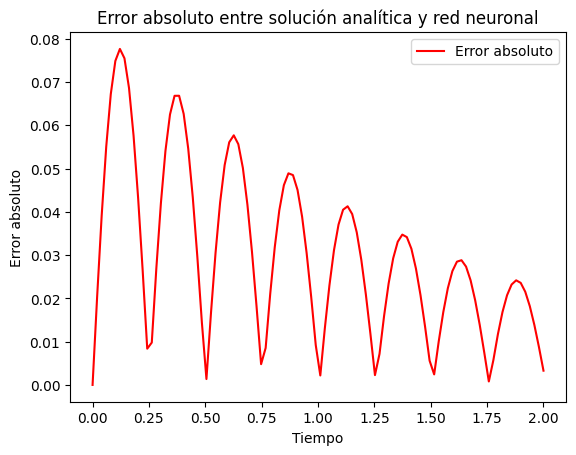

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(42)

import matplotlib.pyplot as plt
from math import pi
import numpy as np

# Parámetros del problema
x0 = 1.
w0 = 4 * pi
xi = 2

w = torch.sqrt(torch.tensor(w0**2 - xi**2/4))
x_sol_under = lambda t: x0 * torch.exp(-0.5 * xi * t) * torch.cos(w * t)

# Arquitectura de la red neuronal con activación Tanh
architecture = lambda: nn.Sequential(
    nn.Linear(1, 64), nn.Tanh(),
    nn.Linear(64, 256), nn.Tanh(),
    nn.Linear(256, 64), nn.Tanh(),
    nn.Linear(64, 1, bias=False)
)

N = architecture()

# Aproximación de la solución
x_t = lambda t, N: x0 + N(t) * (t**2)

# Puntos de tiempo para entrenamiento
t = torch.linspace(0, 2, 500).reshape(-1, 1)

# Función de pérdida basada en la ecuación diferencial
def loss(t, N):
    t.requires_grad = True
    x = x_t(t, N)
    dxdt = torch.autograd.grad(x, t, torch.ones_like(t), create_graph=True)[0]
    d2xdt2 = torch.autograd.grad(dxdt, t, torch.ones_like(t), create_graph=True)[0]
    loss_ode = d2xdt2 + xi * dxdt + (w**2) * x
    return torch.mean(torch.pow(loss_ode, 2))

# Optimizador
optimizer = torch.optim.Adam(N.parameters())

# Entrenamiento
l = loss(t, N)
i = 0

while l.item() > 0.1:
    optimizer.zero_grad()
    l = loss(t, N)
    l.backward()
    optimizer.step()

# Evaluación y visualización
tt = torch.linspace(0, 2, 100).unsqueeze(1)
with torch.no_grad():
    xx = x_t(tt, N).numpy()  # Solución aproximada de la red neuronal
    xt = x_sol_under(tt)       # Solución analítica
    xt_np = xt.detach().numpy()  # Convertir a numpy para el cálculo de error

# Graficar las soluciones
fig, ax = plt.subplots(dpi=100)
ax.plot(tt, xt_np, label='Analítica', linewidth=5, alpha=0.5)
ax.plot(tt, xx, '--', label='Neural network', color='k')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Posición x(t)')
ax.set_title('Solución de la ecuación diferencial (Activación Tanh)')
plt.legend()
plt.show()

# Cálculo y visualización del error absoluto
error = np.abs(xt_np - xx)

fig_error, ax_error = plt.subplots(dpi=100)
ax_error.plot(tt, error, label='Error absoluto', color='r')
ax_error.set_xlabel('Tiempo')
ax_error.set_ylabel('Error absoluto')
ax_error.set_title('Error absoluto entre solución analítica y red neuronal')
plt.legend()
plt.show()


**Oscilador armónico subamortiguado**

Programa optimizado para presentación de resultados, el tiempo de ejecución para este problema es particularmente largo, ofrece buenos resultados visualmmente, pero el error exigido para adecuarse o ser viable sin la solución analítica es alto. Esto se puede ver en la tabla de valores de los errores.



===== INICIANDO ENTRENAMIENTO =====
Oscilador amortiguado: x'' + 2 x' + 12.5265^2 x = 0
Condición inicial: x(0) = 1.0
Épocas: 100000, Puntos de entrenamiento: 500



Entrenamiento:   0%|          | 4/100000 [00:00<42:10, 39.52it/s]

Época 1/100000 - Pérdida: 2.487978e+04, MAE: 6.446806e-01, MSE: 6.499423e-01, Error Máx: 1.777275e+00


Entrenamiento:   1%|          | 1006/100000 [00:20<31:49, 51.85it/s]

Época 1000/100000 - Pérdida: 1.571607e+03, MAE: 3.352596e-01, MSE: 2.190527e-01, Error Máx: 1.311687e+00


Entrenamiento:   2%|▏         | 2007/100000 [00:41<33:27, 48.82it/s]

Época 2000/100000 - Pérdida: 1.130130e+03, MAE: 3.199445e-01, MSE: 1.841769e-01, Error Máx: 1.149604e+00


Entrenamiento:   3%|▎         | 3008/100000 [01:03<34:26, 46.93it/s]

Época 3000/100000 - Pérdida: 8.810374e+02, MAE: 3.003333e-01, MSE: 1.547431e-01, Error Máx: 1.022532e+00


Entrenamiento:   4%|▍         | 4007/100000 [01:23<31:31, 50.75it/s]

Época 4000/100000 - Pérdida: 7.385765e+02, MAE: 2.806737e-01, MSE: 1.309556e-01, Error Máx: 9.325237e-01


Entrenamiento:   5%|▌         | 5010/100000 [01:45<30:35, 51.76it/s]

Época 5000/100000 - Pérdida: 6.385771e+02, MAE: 2.671978e-01, MSE: 1.154840e-01, Error Máx: 8.597274e-01


Entrenamiento:   6%|▌         | 6005/100000 [02:07<47:28, 32.99it/s]

Época 6000/100000 - Pérdida: 5.639678e+02, MAE: 2.573508e-01, MSE: 1.040406e-01, Error Máx: 7.959080e-01


Entrenamiento:   7%|▋         | 7010/100000 [02:27<29:47, 52.01it/s]

Época 7000/100000 - Pérdida: 4.906648e+02, MAE: 2.454519e-01, MSE: 9.271003e-02, Error Máx: 7.381511e-01


Entrenamiento:   8%|▊         | 8009/100000 [02:49<29:57, 51.18it/s]

Época 8000/100000 - Pérdida: 4.274270e+02, MAE: 2.367408e-01, MSE: 8.417690e-02, Error Máx: 6.845709e-01


Entrenamiento:   9%|▉         | 9006/100000 [03:09<41:01, 36.97it/s]

Época 9000/100000 - Pérdida: 3.798106e+02, MAE: 2.212938e-01, MSE: 7.185869e-02, Error Máx: 6.361915e-01


Entrenamiento:  10%|█         | 10006/100000 [03:30<28:49, 52.03it/s]

Época 10000/100000 - Pérdida: 3.245919e+02, MAE: 2.062599e-01, MSE: 6.194326e-02, Error Máx: 5.915793e-01


Entrenamiento:  11%|█         | 11005/100000 [03:52<28:43, 51.63it/s]

Época 11000/100000 - Pérdida: 2.796288e+02, MAE: 1.918598e-01, MSE: 5.342214e-02, Error Máx: 5.504809e-01


Entrenamiento:  12%|█▏        | 12006/100000 [04:12<29:06, 50.39it/s]

Época 12000/100000 - Pérdida: 2.487976e+02, MAE: 1.814235e-01, MSE: 4.747006e-02, Error Máx: 5.159005e-01


Entrenamiento:  13%|█▎        | 13008/100000 [04:33<28:44, 50.46it/s]

Época 13000/100000 - Pérdida: 2.223841e+02, MAE: 1.712072e-01, MSE: 4.207766e-02, Error Máx: 4.850232e-01


Entrenamiento:  14%|█▍        | 14010/100000 [04:55<28:25, 50.41it/s]

Época 14000/100000 - Pérdida: 2.000916e+02, MAE: 1.635987e-01, MSE: 3.810326e-02, Error Máx: 4.573435e-01


Entrenamiento:  15%|█▌        | 15006/100000 [05:15<27:40, 51.19it/s]

Época 15000/100000 - Pérdida: 1.806726e+02, MAE: 1.558958e-01, MSE: 3.437969e-02, Error Máx: 4.325560e-01


Entrenamiento:  16%|█▌        | 16008/100000 [05:37<27:44, 50.46it/s]

Época 16000/100000 - Pérdida: 1.638062e+02, MAE: 1.489180e-01, MSE: 3.120633e-02, Error Máx: 4.102182e-01


Entrenamiento:  17%|█▋        | 17008/100000 [05:59<27:35, 50.13it/s]

Época 17000/100000 - Pérdida: 1.493173e+02, MAE: 1.434225e-01, MSE: 2.876669e-02, Error Máx: 3.894994e-01


Entrenamiento:  18%|█▊        | 18010/100000 [06:19<26:06, 52.33it/s]

Época 18000/100000 - Pérdida: 1.370069e+02, MAE: 1.371254e-01, MSE: 2.624744e-02, Error Máx: 3.731015e-01


Entrenamiento:  19%|█▉        | 19009/100000 [06:40<26:32, 50.86it/s]

Época 19000/100000 - Pérdida: 1.262040e+02, MAE: 1.335966e-01, MSE: 2.469964e-02, Error Máx: 3.568954e-01


Entrenamiento:  20%|██        | 20007/100000 [07:01<37:26, 35.61it/s]

Época 20000/100000 - Pérdida: 1.170822e+02, MAE: 1.275906e-01, MSE: 2.261593e-02, Error Máx: 3.441351e-01


Entrenamiento:  21%|██        | 21007/100000 [07:22<25:03, 52.54it/s]

Época 21000/100000 - Pérdida: 1.094687e+02, MAE: 1.232349e-01, MSE: 2.111526e-02, Error Máx: 3.327211e-01


Entrenamiento:  22%|██▏       | 22005/100000 [07:43<24:53, 52.21it/s]

Época 22000/100000 - Pérdida: 1.012987e+02, MAE: 1.182485e-01, MSE: 1.950031e-02, Error Máx: 3.203951e-01


Entrenamiento:  23%|██▎       | 23004/100000 [08:03<26:18, 48.77it/s]

Época 23000/100000 - Pérdida: 9.555886e+01, MAE: 1.153373e-01, MSE: 1.850994e-02, Error Máx: 3.112504e-01


Entrenamiento:  24%|██▍       | 24007/100000 [08:25<24:47, 51.08it/s]

Época 24000/100000 - Pérdida: 8.982336e+01, MAE: 1.087384e-01, MSE: 1.677065e-02, Error Máx: 3.023457e-01


Entrenamiento:  25%|██▌       | 25009/100000 [08:46<23:32, 53.09it/s]

Época 25000/100000 - Pérdida: 8.199457e+01, MAE: 9.779203e-02, MSE: 1.461298e-02, Error Máx: 2.935179e-01


Entrenamiento:  26%|██▌       | 26008/100000 [09:06<23:39, 52.12it/s]

Época 26000/100000 - Pérdida: 7.769610e+01, MAE: 9.581607e-02, MSE: 1.396024e-02, Error Máx: 2.859067e-01


Entrenamiento:  27%|██▋       | 27010/100000 [09:28<23:19, 52.15it/s]

Época 27000/100000 - Pérdida: 7.519891e+01, MAE: 9.180903e-02, MSE: 1.292934e-02, Error Máx: 2.787943e-01


Entrenamiento:  28%|██▊       | 28007/100000 [09:49<28:50, 41.60it/s]

Época 28000/100000 - Pérdida: 6.934525e+01, MAE: 9.006484e-02, MSE: 1.244768e-02, Error Máx: 2.710243e-01


Entrenamiento:  29%|██▉       | 29009/100000 [10:09<23:01, 51.41it/s]

Época 29000/100000 - Pérdida: 6.557742e+01, MAE: 8.904836e-02, MSE: 1.200490e-02, Error Máx: 2.637951e-01


Entrenamiento:  30%|███       | 30007/100000 [10:30<23:02, 50.63it/s]

Época 30000/100000 - Pérdida: 6.611211e+01, MAE: 9.062858e-02, MSE: 1.205865e-02, Error Máx: 2.561667e-01


Entrenamiento:  31%|███       | 31004/100000 [10:51<31:54, 36.04it/s]

Época 31000/100000 - Pérdida: 5.896937e+01, MAE: 8.522840e-02, MSE: 1.090991e-02, Error Máx: 2.503618e-01


Entrenamiento:  32%|███▏      | 32007/100000 [11:12<21:55, 51.67it/s]

Época 32000/100000 - Pérdida: 5.586774e+01, MAE: 8.130270e-02, MSE: 1.014675e-02, Error Máx: 2.446600e-01


Entrenamiento:  33%|███▎      | 33007/100000 [11:33<21:44, 51.36it/s]

Época 33000/100000 - Pérdida: 5.264198e+01, MAE: 8.085295e-02, MSE: 9.864178e-03, Error Máx: 2.386453e-01


Entrenamiento:  34%|███▍      | 34008/100000 [11:54<21:02, 52.25it/s]

Época 34000/100000 - Pérdida: 4.974462e+01, MAE: 7.865521e-02, MSE: 9.387275e-03, Error Máx: 2.331072e-01


Entrenamiento:  35%|███▌      | 35008/100000 [12:15<22:10, 48.86it/s]

Época 35000/100000 - Pérdida: 4.720194e+01, MAE: 7.723433e-02, MSE: 9.006740e-03, Error Máx: 2.277339e-01


Entrenamiento:  36%|███▌      | 36006/100000 [12:36<20:24, 52.26it/s]

Época 36000/100000 - Pérdida: 4.490690e+01, MAE: 7.465831e-02, MSE: 8.518476e-03, Error Máx: 2.229099e-01


Entrenamiento:  37%|███▋      | 37006/100000 [12:57<20:40, 50.76it/s]

Época 37000/100000 - Pérdida: 4.254524e+01, MAE: 7.389156e-02, MSE: 8.258218e-03, Error Máx: 2.179506e-01


Entrenamiento:  38%|███▊      | 38007/100000 [13:18<20:11, 51.17it/s]

Época 38000/100000 - Pérdida: 4.047246e+01, MAE: 7.232716e-02, MSE: 7.918428e-03, Error Máx: 2.134333e-01


Entrenamiento:  39%|███▉      | 39009/100000 [13:40<20:46, 48.93it/s]

Época 39000/100000 - Pérdida: 3.850645e+01, MAE: 7.100166e-02, MSE: 7.623072e-03, Error Máx: 2.090676e-01


Entrenamiento:  40%|████      | 40007/100000 [14:00<19:50, 50.40it/s]

Época 40000/100000 - Pérdida: 3.666324e+01, MAE: 6.991037e-02, MSE: 7.367734e-03, Error Máx: 2.048419e-01


Entrenamiento:  41%|████      | 41010/100000 [14:21<19:26, 50.57it/s]

Época 41000/100000 - Pérdida: 3.492524e+01, MAE: 6.859108e-02, MSE: 7.083767e-03, Error Máx: 2.008353e-01


Entrenamiento:  42%|████▏     | 42006/100000 [14:43<30:03, 32.16it/s]

Época 42000/100000 - Pérdida: 3.330016e+01, MAE: 6.730790e-02, MSE: 6.822611e-03, Error Máx: 1.970124e-01


Entrenamiento:  43%|████▎     | 43008/100000 [15:03<18:29, 51.38it/s]

Época 43000/100000 - Pérdida: 3.409517e+01, MAE: 6.395742e-02, MSE: 6.397230e-03, Error Máx: 1.941161e-01


Entrenamiento:  44%|████▍     | 44010/100000 [15:25<18:08, 51.45it/s]

Época 44000/100000 - Pérdida: 3.213169e+01, MAE: 6.308165e-02, MSE: 6.186276e-03, Error Máx: 1.904598e-01


Entrenamiento:  45%|████▌     | 45005/100000 [15:46<26:10, 35.01it/s]

Época 45000/100000 - Pérdida: 2.899950e+01, MAE: 6.422590e-02, MSE: 6.176138e-03, Error Máx: 1.865737e-01


Entrenamiento:  46%|████▌     | 46008/100000 [16:06<17:41, 50.88it/s]

Época 46000/100000 - Pérdida: 2.778034e+01, MAE: 6.358431e-02, MSE: 6.018846e-03, Error Máx: 1.834008e-01


Entrenamiento:  47%|████▋     | 47007/100000 [16:28<17:02, 51.84it/s]

Época 47000/100000 - Pérdida: 2.659436e+01, MAE: 6.261156e-02, MSE: 5.817063e-03, Error Máx: 1.801290e-01


Entrenamiento:  48%|████▊     | 48005/100000 [16:48<16:50, 51.46it/s]

Época 48000/100000 - Pérdida: 2.546060e+01, MAE: 6.057340e-02, MSE: 5.549203e-03, Error Máx: 1.775973e-01


Entrenamiento:  49%|████▉     | 49010/100000 [17:09<16:25, 51.72it/s]

Época 49000/100000 - Pérdida: 2.434473e+01, MAE: 6.035955e-02, MSE: 5.455233e-03, Error Máx: 1.745704e-01


Entrenamiento:  50%|█████     | 50009/100000 [17:30<16:54, 49.27it/s]

Época 50000/100000 - Pérdida: 2.338353e+01, MAE: 5.920157e-02, MSE: 5.239154e-03, Error Máx: 1.721142e-01


Entrenamiento:  51%|█████     | 51008/100000 [17:51<15:19, 53.26it/s]

Época 51000/100000 - Pérdida: 2.234779e+01, MAE: 5.899276e-02, MSE: 5.171498e-03, Error Máx: 1.692243e-01


Entrenamiento:  52%|█████▏    | 52010/100000 [18:12<15:32, 51.47it/s]

Época 52000/100000 - Pérdida: 2.467700e+01, MAE: 5.585264e-02, MSE: 4.838943e-03, Error Máx: 1.678910e-01


Entrenamiento:  53%|█████▎    | 53005/100000 [18:33<22:59, 34.08it/s]

Época 53000/100000 - Pérdida: 2.055790e+01, MAE: 5.712367e-02, MSE: 4.868036e-03, Error Máx: 1.644342e-01


Entrenamiento:  54%|█████▍    | 54007/100000 [18:53<15:27, 49.61it/s]

Época 54000/100000 - Pérdida: 1.974009e+01, MAE: 5.648737e-02, MSE: 4.747843e-03, Error Máx: 1.621147e-01


Entrenamiento:  55%|█████▌    | 55006/100000 [19:15<14:38, 51.21it/s]

Época 55000/100000 - Pérdida: 2.274562e+01, MAE: 5.991207e-02, MSE: 5.127490e-03, Error Máx: 1.589206e-01


Entrenamiento:  56%|█████▌    | 56003/100000 [19:35<14:15, 51.43it/s]

Época 56000/100000 - Pérdida: 1.823774e+01, MAE: 5.512540e-02, MSE: 4.515815e-03, Error Máx: 1.577861e-01


Entrenamiento:  57%|█████▋    | 57007/100000 [19:56<13:43, 52.20it/s]

Época 57000/100000 - Pérdida: 1.759164e+01, MAE: 5.424040e-02, MSE: 4.384748e-03, Error Máx: 1.558436e-01


Entrenamiento:  58%|█████▊    | 58007/100000 [20:17<14:00, 49.97it/s]

Época 58000/100000 - Pérdida: 1.689122e+01, MAE: 5.407409e-02, MSE: 4.324927e-03, Error Máx: 1.536714e-01


Entrenamiento:  59%|█████▉    | 59008/100000 [20:37<12:58, 52.68it/s]

Época 59000/100000 - Pérdida: 1.626039e+01, MAE: 5.327360e-02, MSE: 4.210368e-03, Error Máx: 1.518407e-01


Entrenamiento:  60%|██████    | 60007/100000 [20:59<13:22, 49.82it/s]

Época 60000/100000 - Pérdida: 1.566055e+01, MAE: 5.272296e-02, MSE: 4.119147e-03, Error Máx: 1.499913e-01


Entrenamiento:  61%|██████    | 61006/100000 [21:20<19:33, 33.24it/s]

Época 61000/100000 - Pérdida: 1.509349e+01, MAE: 5.225442e-02, MSE: 4.033800e-03, Error Máx: 1.482303e-01


Entrenamiento:  62%|██████▏   | 62006/100000 [21:41<12:34, 50.37it/s]

Época 62000/100000 - Pérdida: 1.461084e+01, MAE: 5.135562e-02, MSE: 3.919647e-03, Error Máx: 1.466946e-01


Entrenamiento:  63%|██████▎   | 63005/100000 [22:03<12:05, 51.00it/s]

Época 63000/100000 - Pérdida: 1.426311e+01, MAE: 5.205467e-02, MSE: 3.947074e-03, Error Máx: 1.446451e-01


Entrenamiento:  64%|██████▍   | 64003/100000 [22:24<18:23, 32.61it/s]

Época 64000/100000 - Pérdida: 1.367100e+01, MAE: 5.061328e-02, MSE: 3.784979e-03, Error Máx: 1.433802e-01


Entrenamiento:  65%|██████▌   | 65005/100000 [22:45<11:29, 50.74it/s]

Época 65000/100000 - Pérdida: 1.310950e+01, MAE: 5.001797e-02, MSE: 3.700687e-03, Error Máx: 1.418229e-01


Entrenamiento:  66%|██████▌   | 66007/100000 [23:06<11:11, 50.61it/s]

Época 66000/100000 - Pérdida: 1.273283e+01, MAE: 5.001797e-02, MSE: 3.662603e-03, Error Máx: 1.404537e-01


Entrenamiento:  67%|██████▋   | 67004/100000 [23:27<15:20, 35.85it/s]

Época 67000/100000 - Pérdida: 1.221530e+01, MAE: 4.928053e-02, MSE: 3.578317e-03, Error Máx: 1.389364e-01


Entrenamiento:  68%|██████▊   | 68006/100000 [23:48<10:17, 51.80it/s]

Época 68000/100000 - Pérdida: 1.181193e+01, MAE: 4.898793e-02, MSE: 3.527064e-03, Error Máx: 1.375275e-01


Entrenamiento:  69%|██████▉   | 69010/100000 [24:09<10:06, 51.08it/s]

Época 69000/100000 - Pérdida: 1.147686e+01, MAE: 4.803028e-02, MSE: 3.420021e-03, Error Máx: 1.363745e-01


Entrenamiento:  70%|███████   | 70010/100000 [24:30<09:49, 50.83it/s]

Época 70000/100000 - Pérdida: 1.104843e+01, MAE: 4.808636e-02, MSE: 3.395611e-03, Error Máx: 1.349393e-01


Entrenamiento:  71%|███████   | 71008/100000 [24:51<09:37, 50.19it/s]

Época 71000/100000 - Pérdida: 1.069485e+01, MAE: 4.769486e-02, MSE: 3.338751e-03, Error Máx: 1.337107e-01


Entrenamiento:  72%|███████▏  | 72005/100000 [25:13<09:26, 49.40it/s]

Época 72000/100000 - Pérdida: 1.035773e+01, MAE: 4.726514e-02, MSE: 3.281377e-03, Error Máx: 1.325163e-01


Entrenamiento:  73%|███████▎  | 73004/100000 [25:33<09:09, 49.09it/s]

Época 73000/100000 - Pérdida: 1.004964e+01, MAE: 4.695110e-02, MSE: 3.229766e-03, Error Máx: 1.313055e-01


Entrenamiento:  74%|███████▍  | 74009/100000 [25:55<08:24, 51.50it/s]

Época 74000/100000 - Pérdida: 9.727263e+00, MAE: 4.668642e-02, MSE: 3.189533e-03, Error Máx: 1.301896e-01


Entrenamiento:  75%|███████▌  | 75006/100000 [26:16<08:11, 50.87it/s]

Época 75000/100000 - Pérdida: 9.432490e+00, MAE: 4.635337e-02, MSE: 3.141369e-03, Error Máx: 1.290977e-01


Entrenamiento:  76%|███████▌  | 76008/100000 [26:37<07:58, 50.15it/s]

Época 76000/100000 - Pérdida: 9.156669e+00, MAE: 4.592236e-02, MSE: 3.087868e-03, Error Máx: 1.280610e-01


Entrenamiento:  77%|███████▋  | 77005/100000 [26:58<07:29, 51.18it/s]

Época 77000/100000 - Pérdida: 8.873824e+00, MAE: 4.561723e-02, MSE: 3.045085e-03, Error Máx: 1.270512e-01


Entrenamiento:  78%|███████▊  | 78005/100000 [27:20<07:38, 48.02it/s]

Época 78000/100000 - Pérdida: 8.645191e+00, MAE: 4.539827e-02, MSE: 3.008927e-03, Error Máx: 1.259832e-01


Entrenamiento:  79%|███████▉  | 79008/100000 [27:41<07:00, 49.94it/s]

Época 79000/100000 - Pérdida: 8.366242e+00, MAE: 4.505735e-02, MSE: 2.963732e-03, Error Máx: 1.250889e-01


Entrenamiento:  80%|████████  | 80010/100000 [28:02<06:31, 51.09it/s]

Época 80000/100000 - Pérdida: 8.128086e+00, MAE: 4.472912e-02, MSE: 2.921236e-03, Error Máx: 1.241923e-01


Entrenamiento:  81%|████████  | 81006/100000 [28:23<09:08, 34.61it/s]

Época 81000/100000 - Pérdida: 7.900604e+00, MAE: 4.440277e-02, MSE: 2.880418e-03, Error Máx: 1.233148e-01


Entrenamiento:  82%|████████▏ | 82005/100000 [28:44<05:59, 50.11it/s]

Época 82000/100000 - Pérdida: 7.683649e+00, MAE: 4.425519e-02, MSE: 2.853044e-03, Error Máx: 1.224111e-01


Entrenamiento:  83%|████████▎ | 83010/100000 [29:05<05:24, 52.42it/s]

Época 83000/100000 - Pérdida: 7.474693e+00, MAE: 4.404286e-02, MSE: 2.821197e-03, Error Máx: 1.215747e-01


Entrenamiento:  84%|████████▍ | 84006/100000 [29:26<07:47, 34.18it/s]

Época 84000/100000 - Pérdida: 7.271904e+00, MAE: 4.369043e-02, MSE: 2.780806e-03, Error Máx: 1.207872e-01


Entrenamiento:  85%|████████▌ | 85008/100000 [29:47<04:49, 51.75it/s]

Época 85000/100000 - Pérdida: 7.080052e+00, MAE: 4.344180e-02, MSE: 2.747824e-03, Error Máx: 1.199991e-01


Entrenamiento:  86%|████████▌ | 86007/100000 [30:08<04:31, 51.54it/s]

Época 86000/100000 - Pérdida: 6.895828e+00, MAE: 4.323092e-02, MSE: 2.718471e-03, Error Máx: 1.192327e-01


Entrenamiento:  87%|████████▋ | 87006/100000 [30:29<04:12, 51.37it/s]

Época 87000/100000 - Pérdida: 6.717962e+00, MAE: 4.298424e-02, MSE: 2.687123e-03, Error Máx: 1.184922e-01


Entrenamiento:  88%|████████▊ | 88009/100000 [30:50<04:05, 48.90it/s]

Época 88000/100000 - Pérdida: 6.548485e+00, MAE: 4.276865e-02, MSE: 2.658317e-03, Error Máx: 1.177741e-01


Entrenamiento:  89%|████████▉ | 89007/100000 [31:11<03:41, 49.56it/s]

Época 89000/100000 - Pérdida: 6.387597e+00, MAE: 4.256906e-02, MSE: 2.631468e-03, Error Máx: 1.170710e-01


Entrenamiento:  90%|█████████ | 90005/100000 [31:32<03:15, 51.19it/s]

Época 90000/100000 - Pérdida: 6.230893e+00, MAE: 4.228497e-02, MSE: 2.600054e-03, Error Máx: 1.164259e-01


Entrenamiento:  91%|█████████ | 91007/100000 [31:53<02:51, 52.33it/s]

Época 91000/100000 - Pérdida: 6.080268e+00, MAE: 4.214174e-02, MSE: 2.577840e-03, Error Máx: 1.157615e-01


Entrenamiento:  92%|█████████▏| 92005/100000 [32:14<04:01, 33.08it/s]

Época 92000/100000 - Pérdida: 5.937622e+00, MAE: 4.190818e-02, MSE: 2.550442e-03, Error Máx: 1.151521e-01


Entrenamiento:  93%|█████████▎| 93006/100000 [32:35<02:17, 50.83it/s]

Época 93000/100000 - Pérdida: 5.799461e+00, MAE: 4.175711e-02, MSE: 2.529222e-03, Error Máx: 1.145392e-01


Entrenamiento:  94%|█████████▍| 94008/100000 [32:57<01:57, 51.04it/s]

Época 94000/100000 - Pérdida: 5.667968e+00, MAE: 4.158470e-02, MSE: 2.506850e-03, Error Máx: 1.139618e-01


Entrenamiento:  95%|█████████▌| 95004/100000 [33:18<02:26, 34.14it/s]

Época 95000/100000 - Pérdida: 5.541921e+00, MAE: 4.140583e-02, MSE: 2.484686e-03, Error Máx: 1.134075e-01


Entrenamiento:  96%|█████████▌| 96005/100000 [33:38<01:16, 51.89it/s]

Época 96000/100000 - Pérdida: 5.423356e+00, MAE: 4.123463e-02, MSE: 2.463615e-03, Error Máx: 1.128864e-01


Entrenamiento:  97%|█████████▋| 97008/100000 [34:00<00:57, 52.05it/s]

Época 97000/100000 - Pérdida: 5.325655e+00, MAE: 4.109696e-02, MSE: 2.446438e-03, Error Máx: 1.124542e-01


Entrenamiento:  98%|█████████▊| 98007/100000 [34:20<00:45, 43.99it/s]

Época 98000/100000 - Pérdida: 5.258795e+00, MAE: 4.099410e-02, MSE: 2.434076e-03, Error Máx: 1.121648e-01


Entrenamiento:  99%|█████████▉| 99008/100000 [34:42<00:20, 48.86it/s]

Época 99000/100000 - Pérdida: 5.228540e+00, MAE: 4.094128e-02, MSE: 2.428012e-03, Error Máx: 1.120411e-01


Entrenamiento: 100%|██████████| 100000/100000 [35:03<00:00, 47.54it/s]


Época 100000/100000 - Pérdida: 5.223941e+00, MAE: 4.093641e-02, MSE: 2.427345e-03, Error Máx: 1.120241e-01

Tiempo total de entrenamiento: 2103.38 segundos


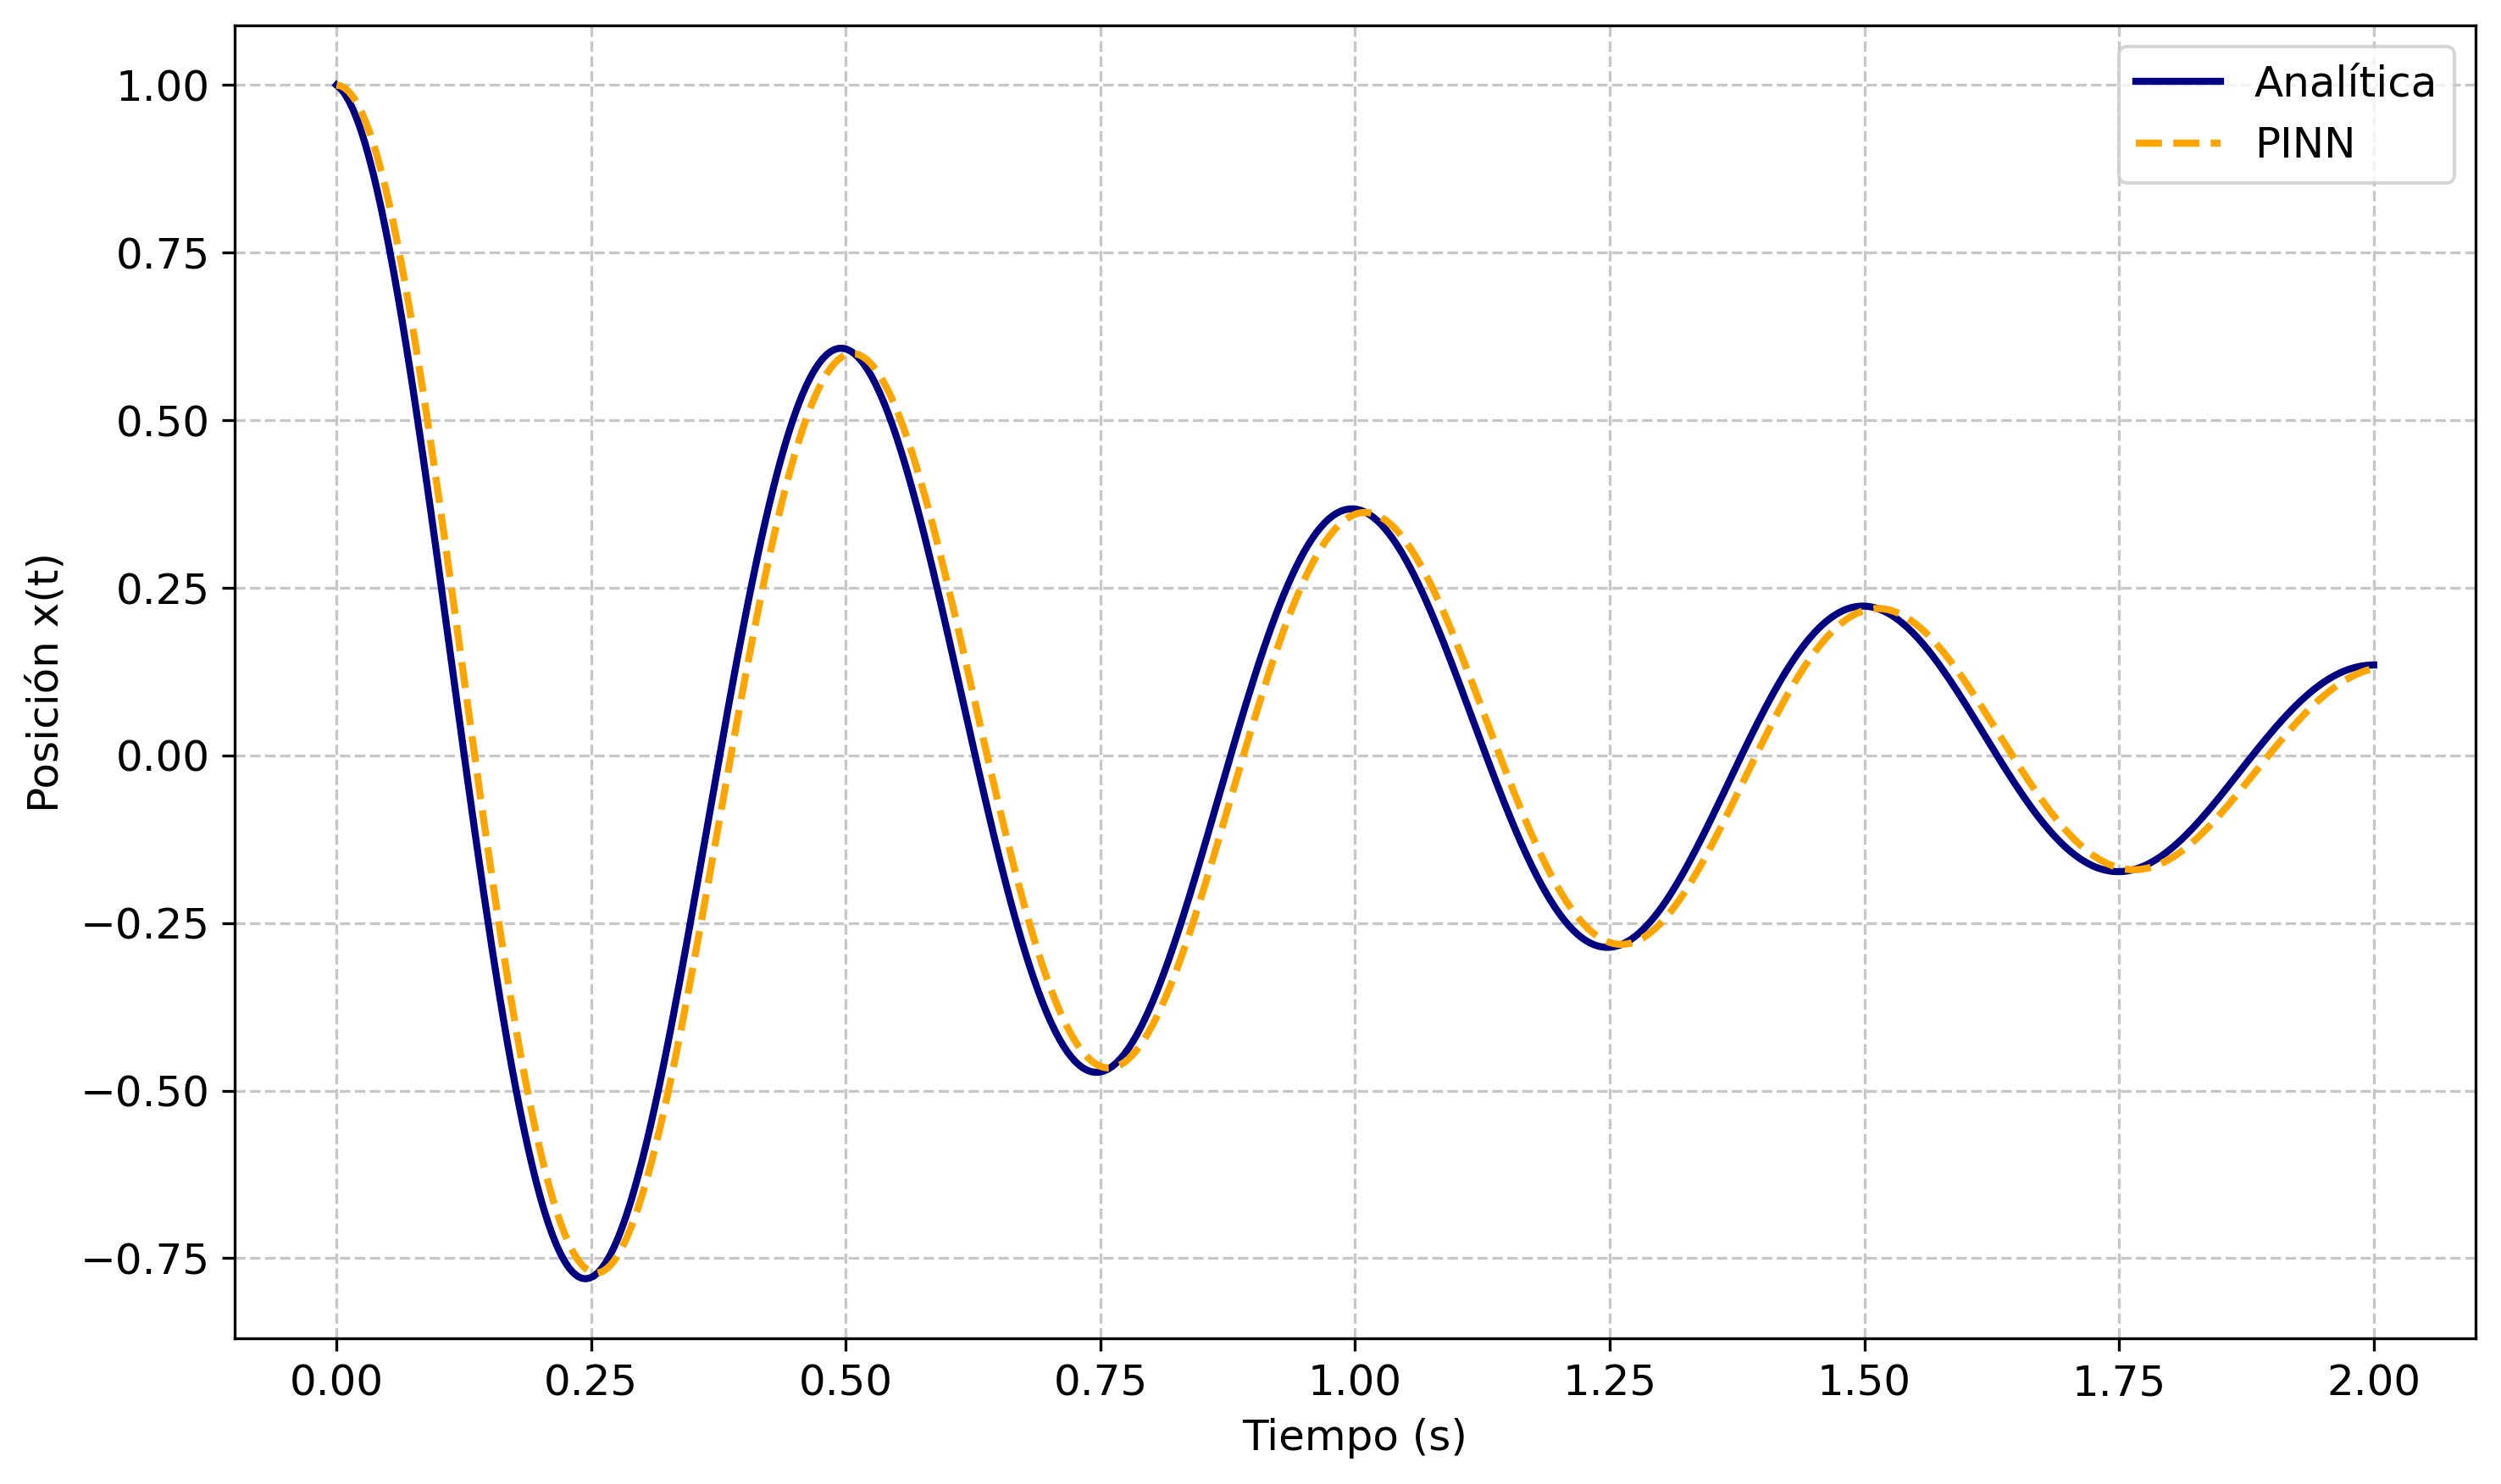

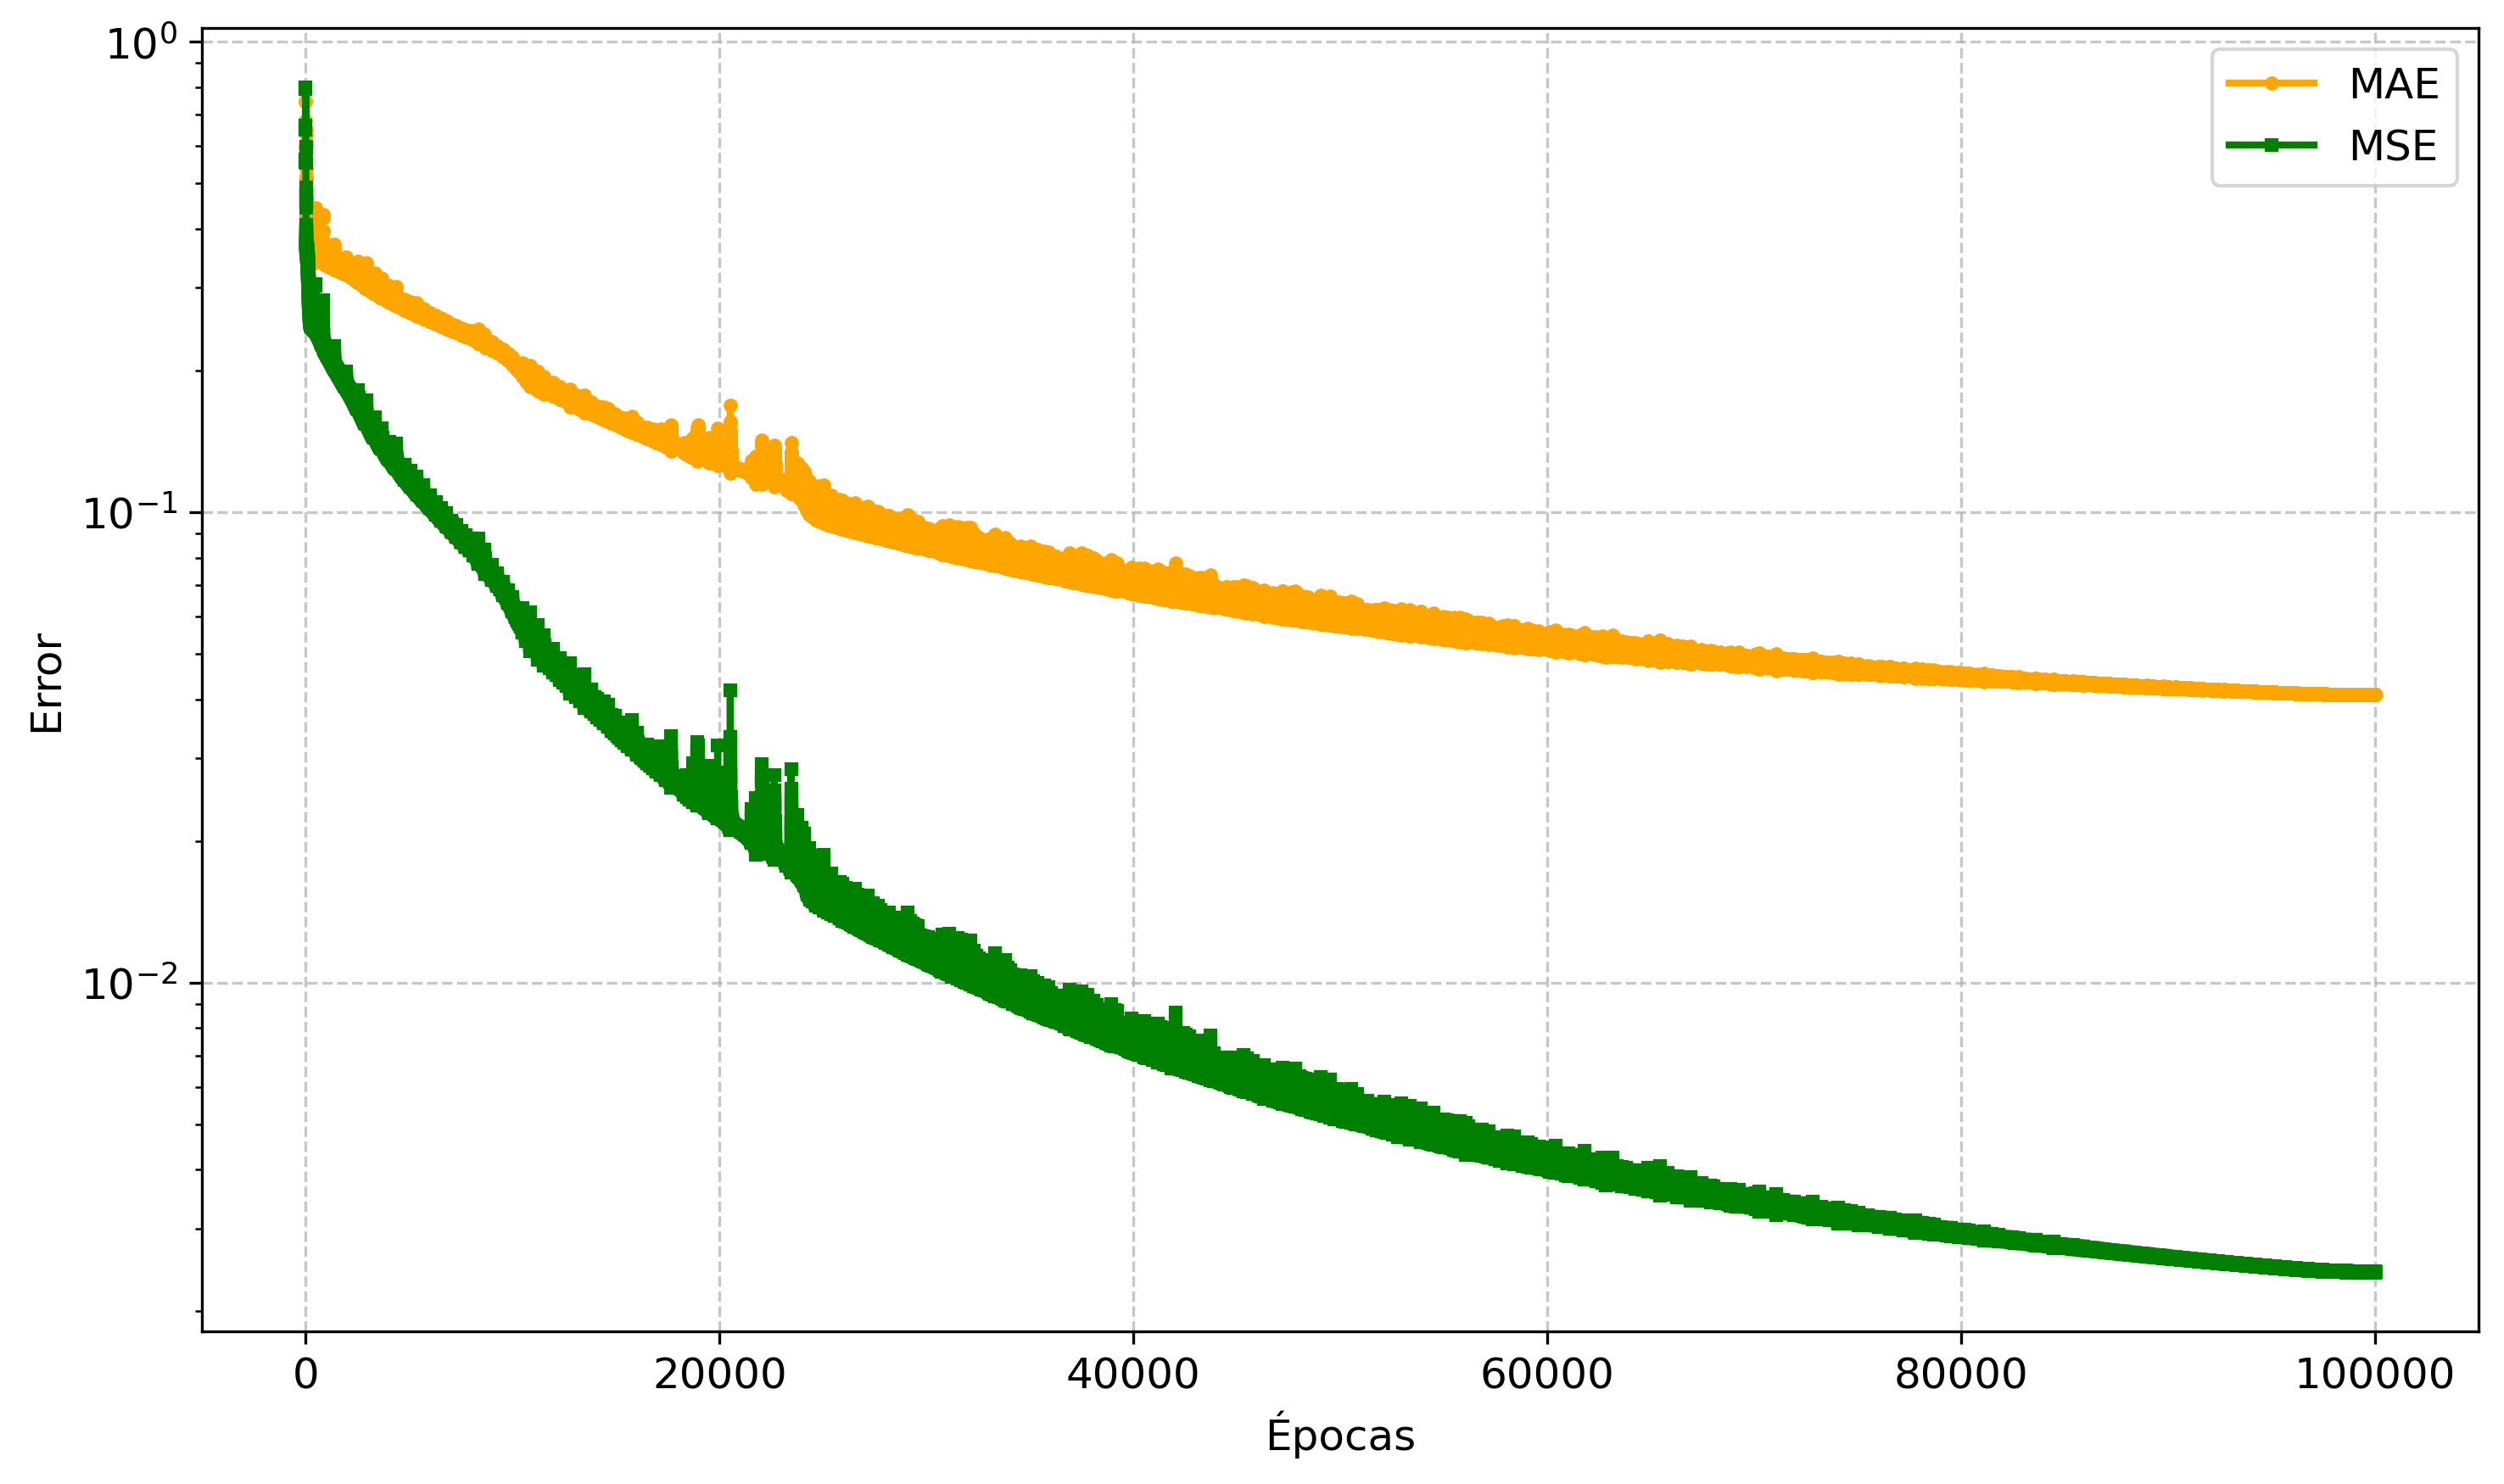

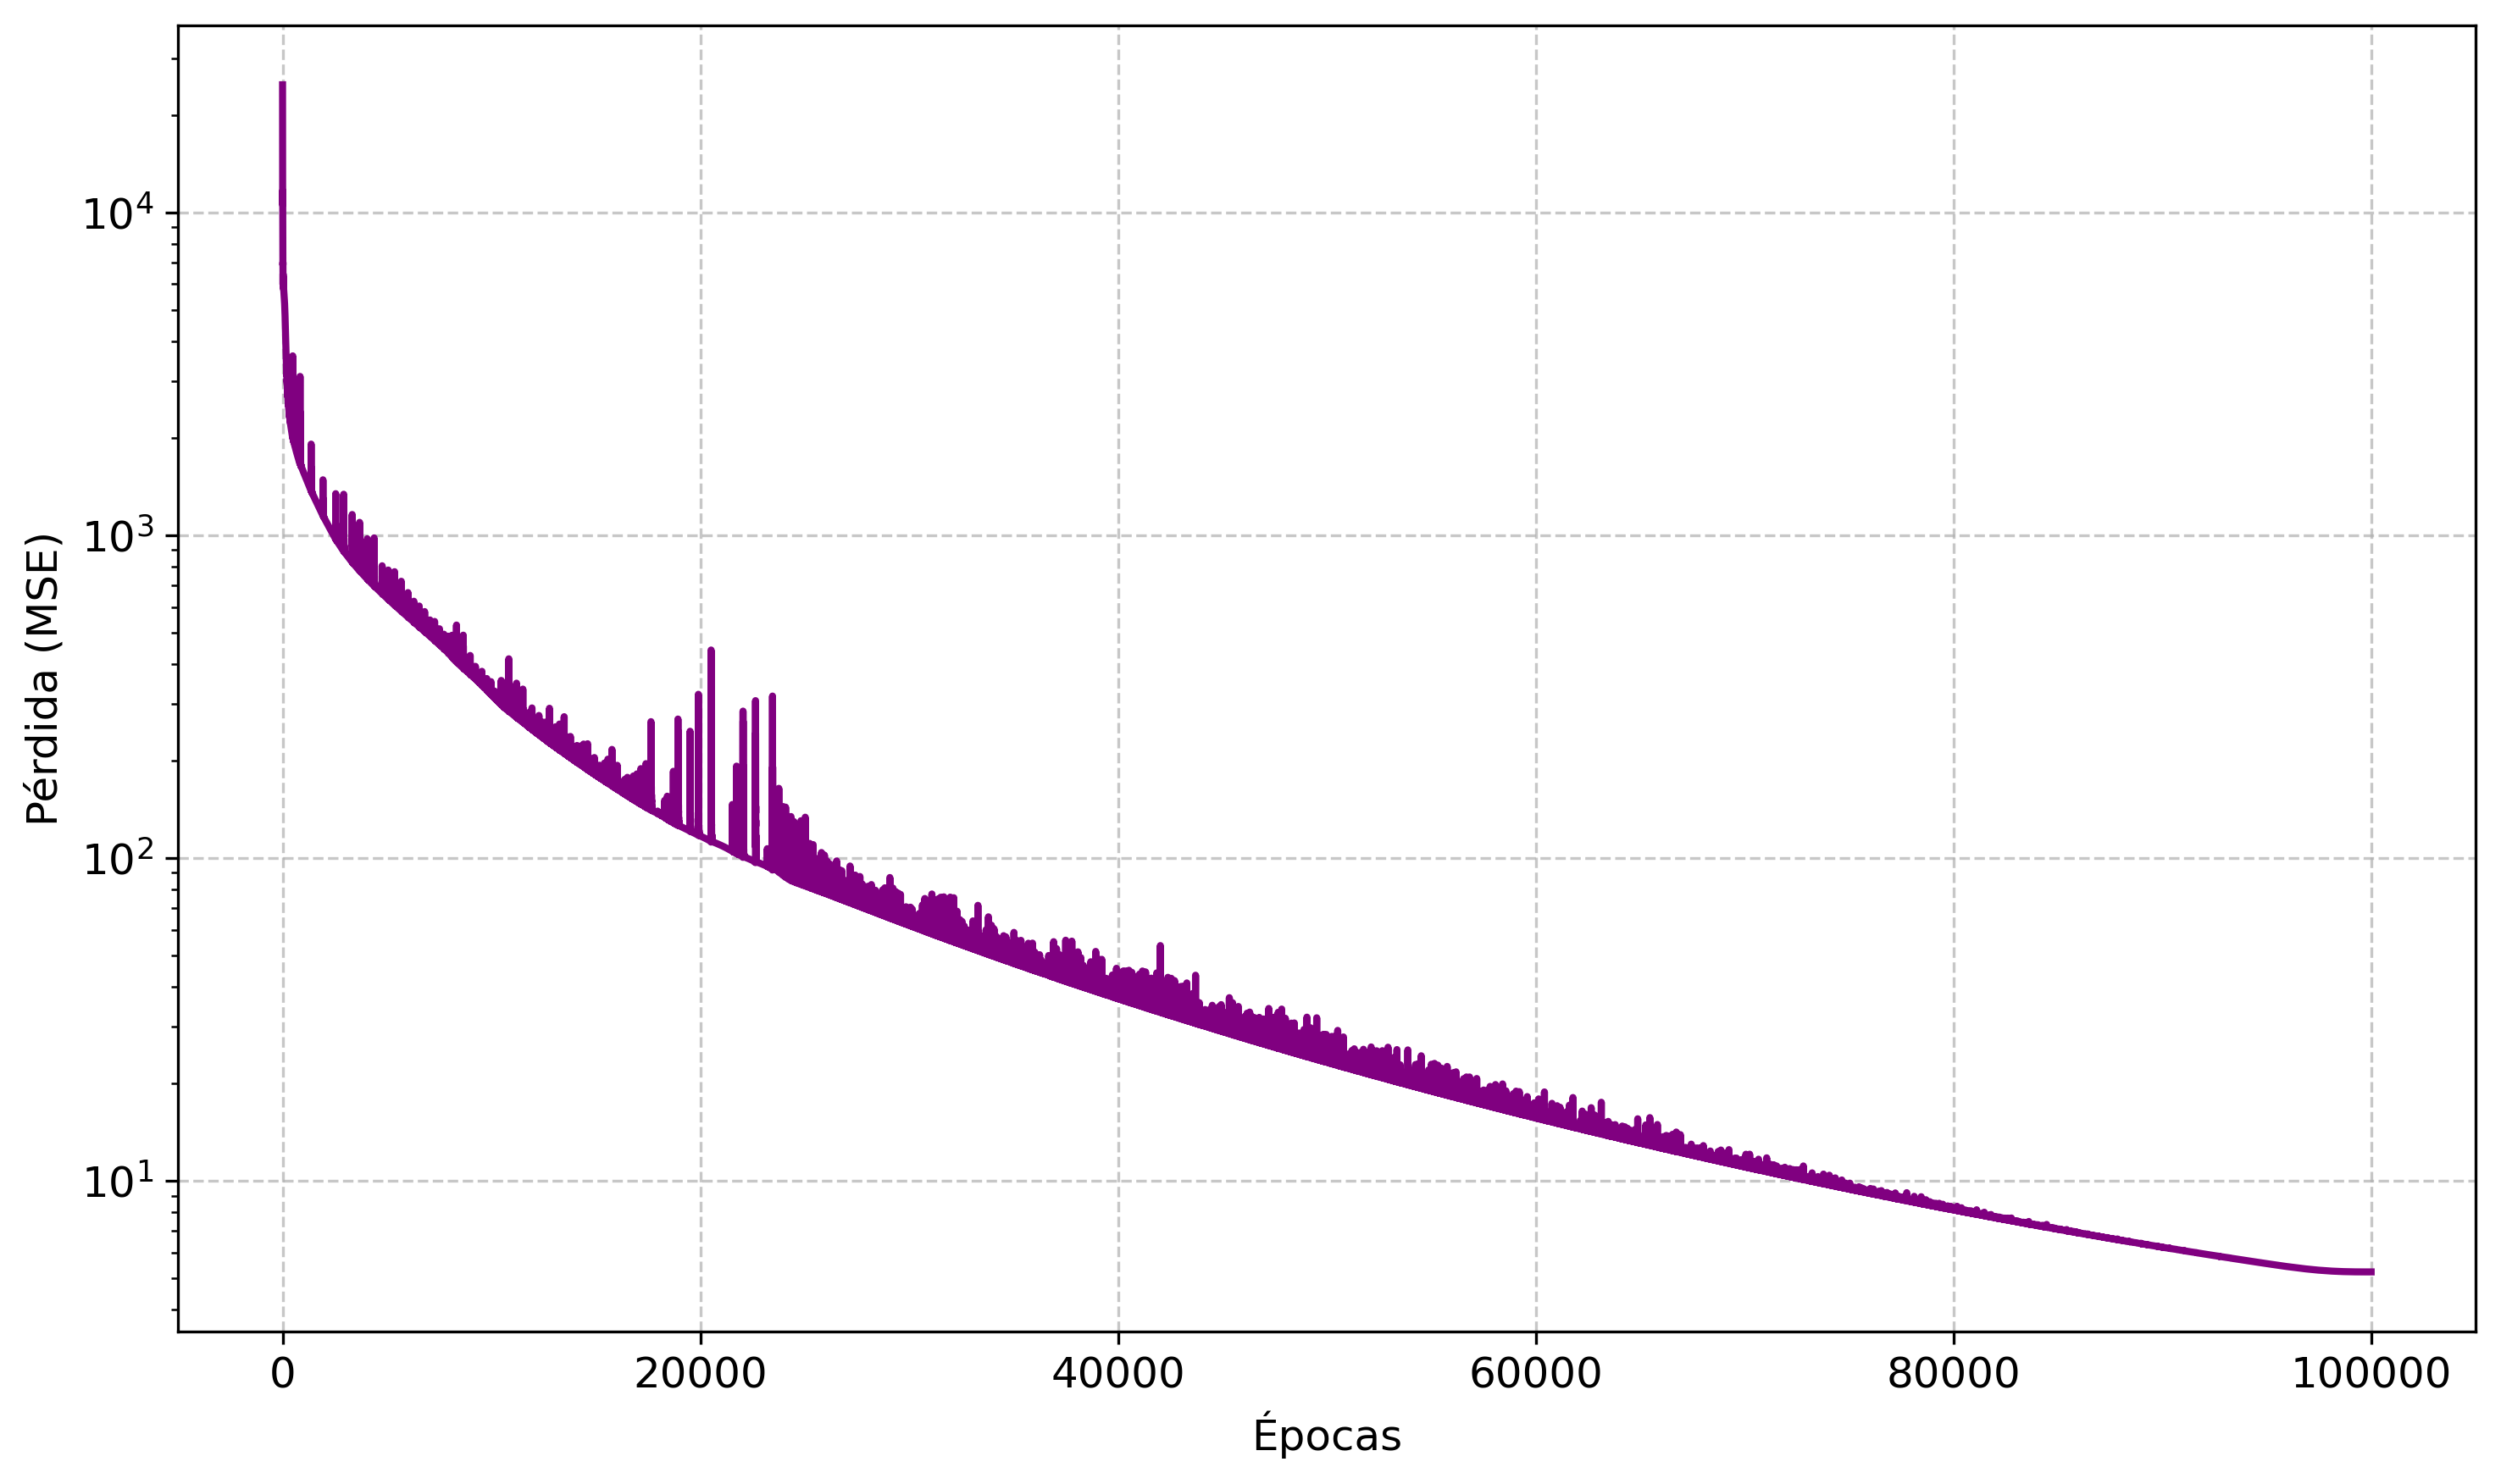

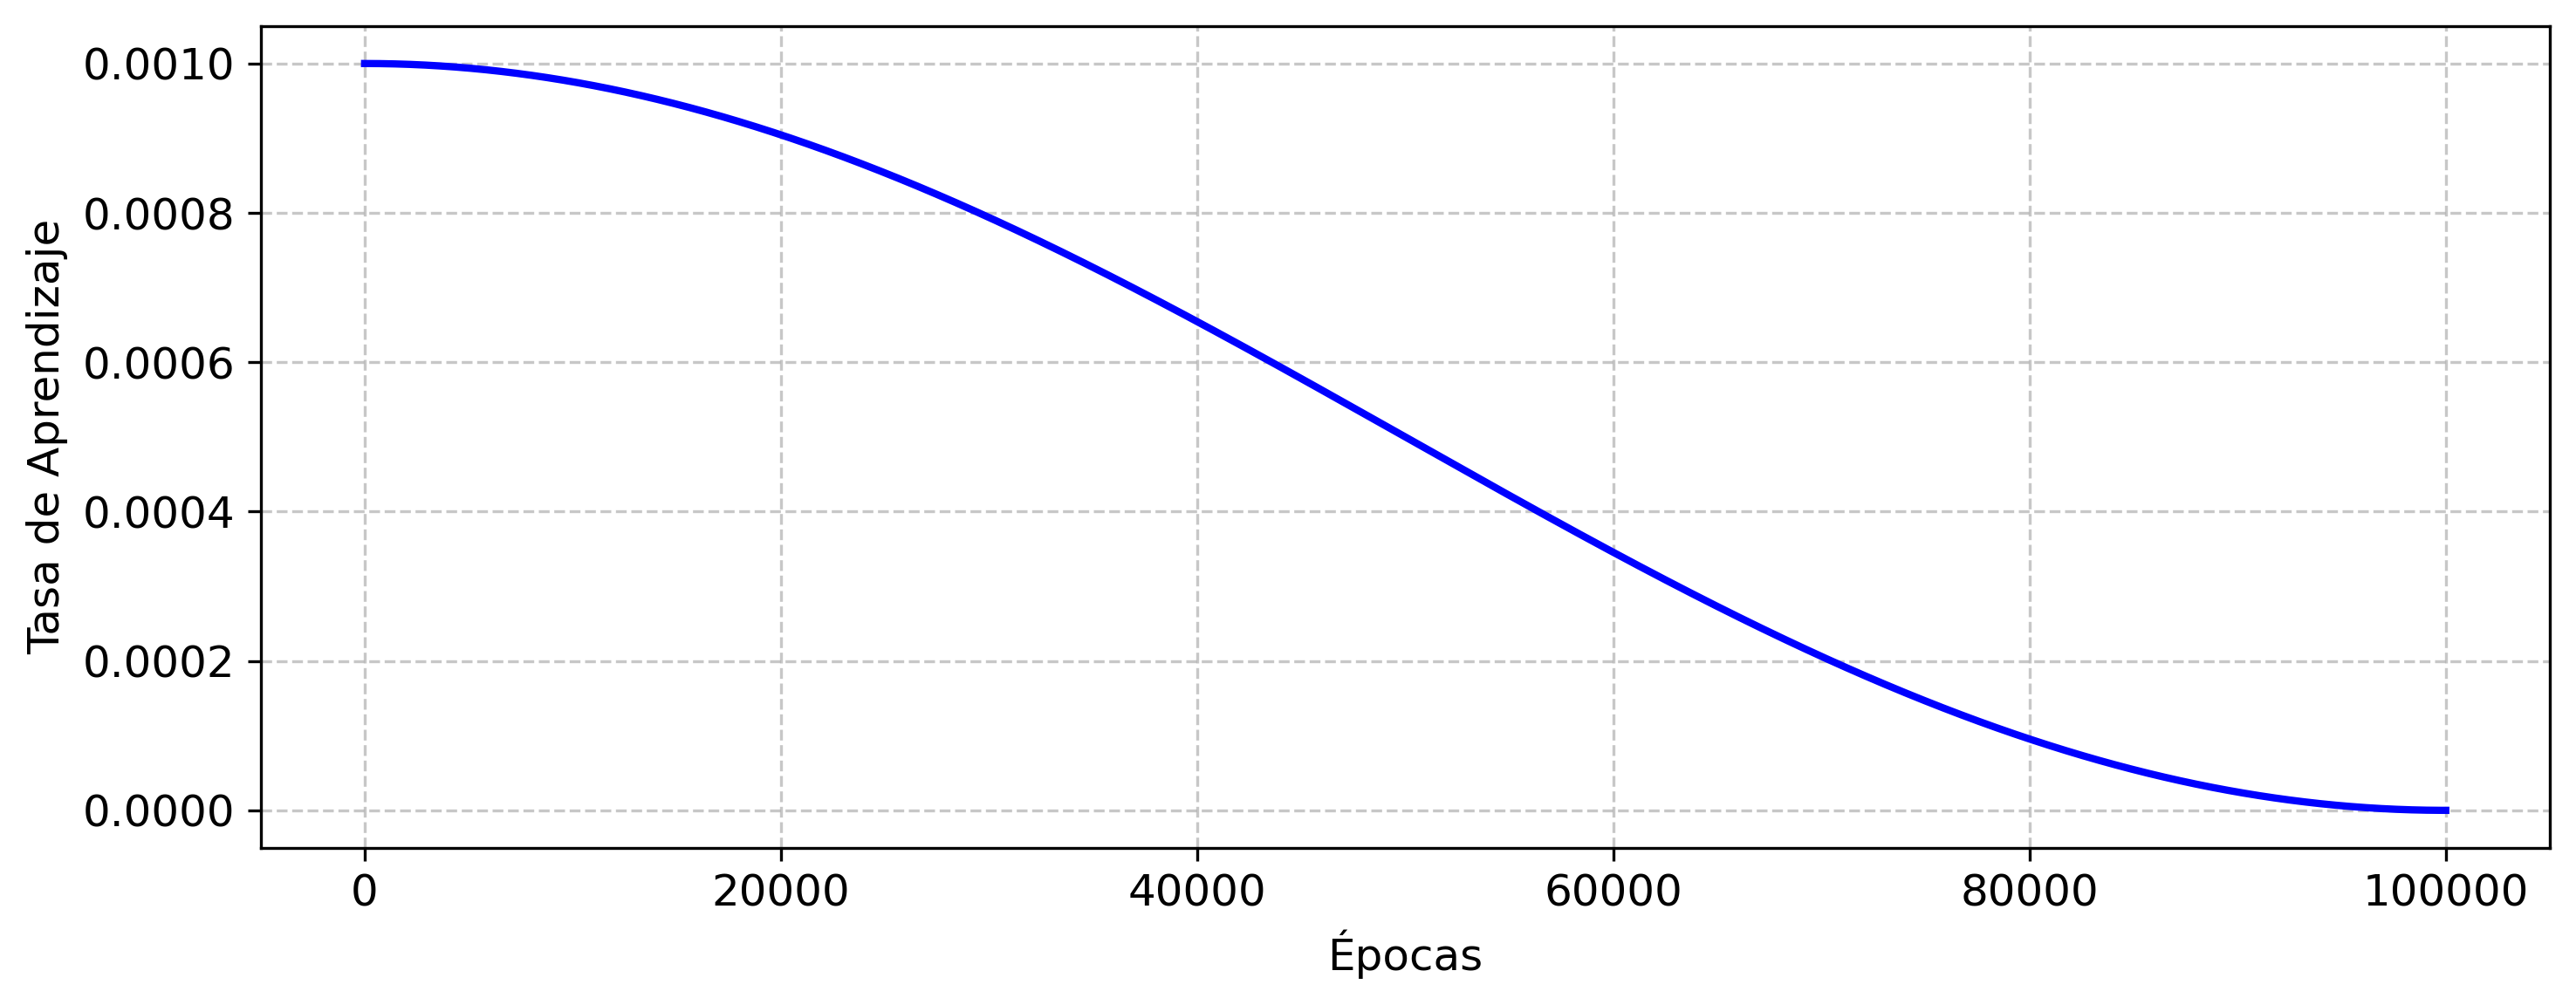

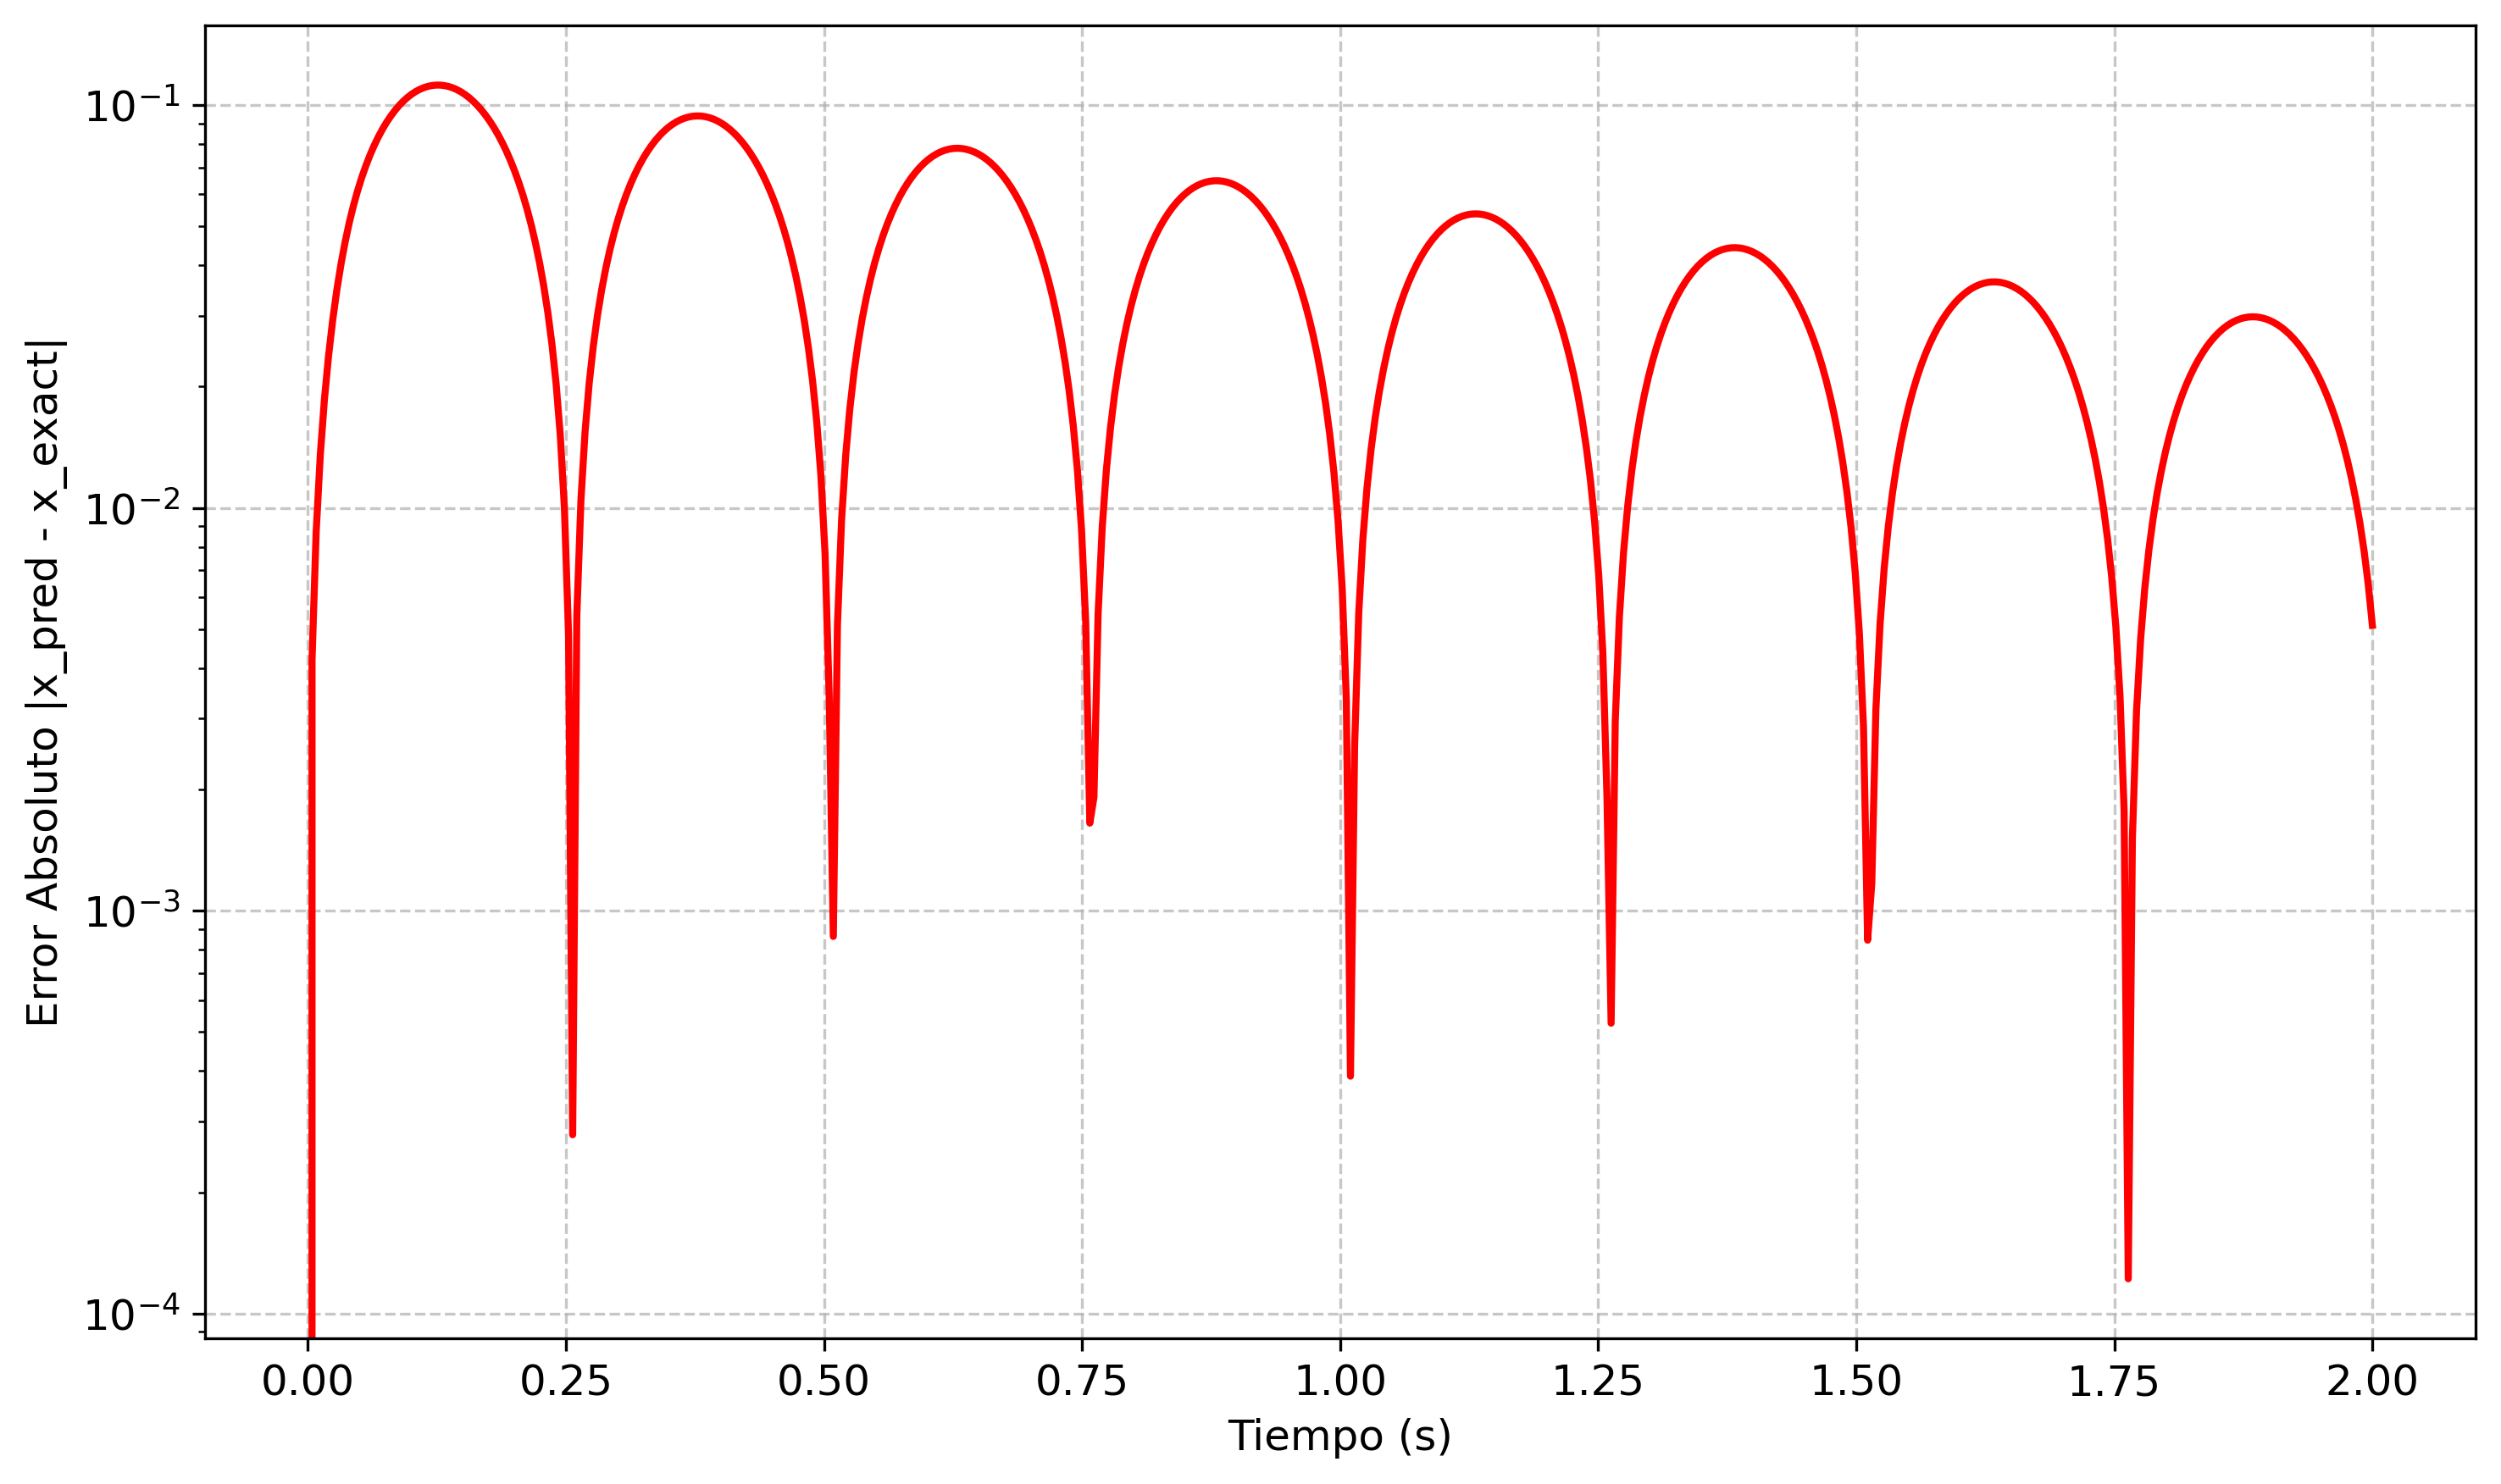

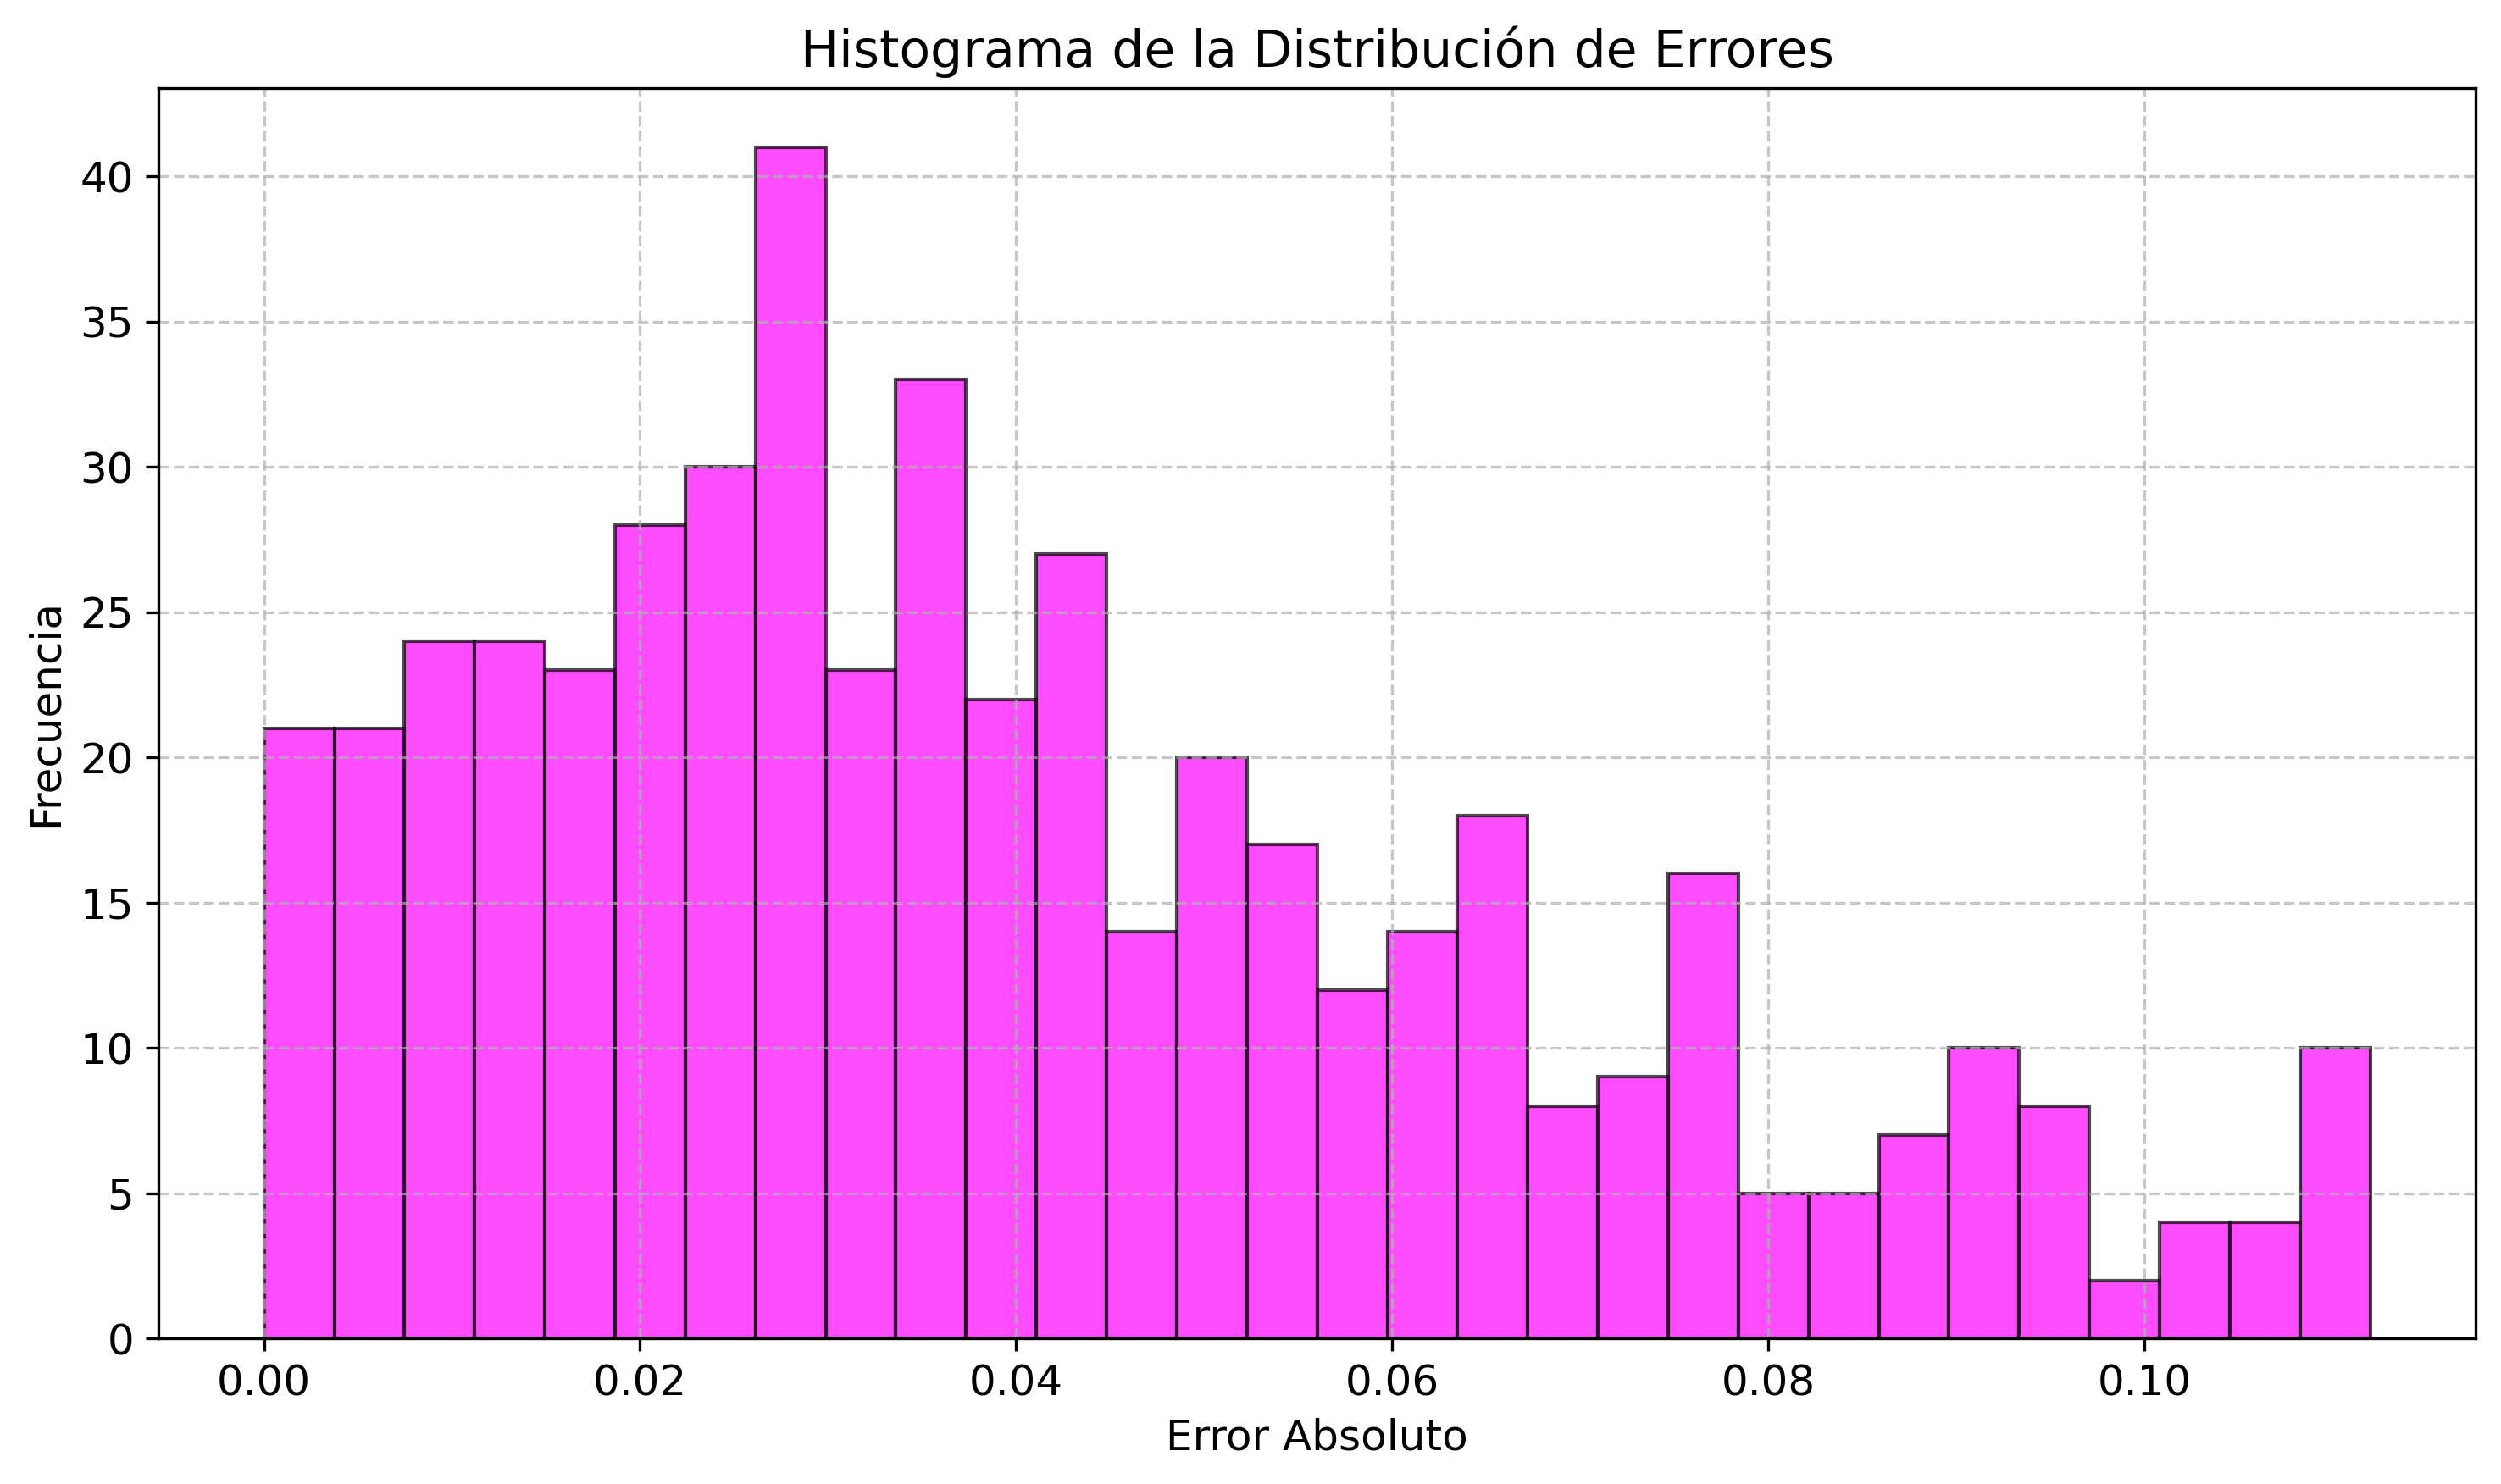


=== INFORME DE RESULTADOS ===
Tiempo de entrenamiento: 2103.38 segundos
Modelo adecuado para la ecuación: ✗ No

Tabla de errores finales:
           Métrica  Valor Final  Promedio (últimas 100 épocas)
               MAE     0.040936                       0.040936
               MSE     0.002427                       0.002427
Error Máx Absoluto     0.112024                       0.112024

Criterios de aceptación:
- MAE: ✗ (límite: 1.00e-03, obtenido: 4.09e-02)
- MSE: ✗ (límite: 1.00e-04, obtenido: 2.43e-03)
- Error Máx Absoluto: ✗ (límite: 1.00e-03, obtenido: 1.12e-01)

Tabla de convergencia numérica:
 Época      Pérdida          MAE          MSE    Error Máx
     1 2.487978e+04 6.446806e-01 6.499423e-01 1.777275e+00
   101 5.185017e+03 3.967597e-01 3.393110e-01 1.672994e+00
   501 2.241015e+03 3.552653e-01 2.501694e-01 1.417942e+00
  1001 1.571032e+03 3.352427e-01 2.190118e-01 1.311515e+00
  2001 1.129609e+03 3.199764e-01 1.841645e-01 1.149462e+00
100000 5.223941e+00 4.093641e-02 2.42

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm
import os

# =====================================================
# CREAR DIRECTORIO PARA RESULTADOS
# =====================================================
output_dir = "resultados_pinn_oscillator"
os.makedirs(output_dir, exist_ok=True)

# =====================================================
# CONFIGURACIÓN DEL PROBLEMA (OSILADOR AMORTIGUADO)
# =====================================================
# Parámetros físicos
x0 = 1.         # Condición inicial: posición en t=0
w0 = 4 * np.pi  # Frecuencia natural
xi = 2          # Coeficiente de amortiguamiento

# Cálculo de la frecuencia del oscilador amortiguado subcrítico
w = torch.sqrt(torch.tensor(w0**2 - xi**2 / 4, dtype=torch.float32))

# Intervalo temporal
t_max = 2.0

# =====================================================
# SOLUCIÓN ANALÍTICA
# =====================================================
def analytic_solution(t):
    """
    Calcula la solución exacta del oscilador amortiguado subcrítico:
       x(t) = x0 * exp(-xi*t/2) * cos(w*t)

    Args:
        t (torch.Tensor): Tiempo.

    Returns:
        torch.Tensor: Solución analítica.
    """
    return x0 * torch.exp(-0.5 * xi * t) * torch.cos(w * t)

# =====================================================
# ARQUITECTURA DE LA RED NEURONAL (PINN)
# =====================================================
def architecture():
    """
    Define la red neuronal con activación Tanh.
    La solución se expresa como:
         x_t(t) = x0 + t^2 * N(t)
    para garantizar que x(0)=x0.
    """
    return nn.Sequential(
        nn.Linear(1, 64), nn.Tanh(),
        nn.Linear(64, 256), nn.Tanh(),
        nn.Linear(256, 64), nn.Tanh(),
        nn.Linear(64, 1, bias=False)
    )

# Inicializamos la red
model = architecture()

# =====================================================
# SOLUCIÓN DE PRUEBA (TRIAL SOLUTION)
# =====================================================
def trial_solution(t, model):
    """
    Define la solución de prueba que satisface la condición inicial:
         x(0) = x0.
    Se expresa como: x(t) = x0 + t^2 * N(t)
    """
    return x0 + model(t) * (t ** 2)

# =====================================================
# FUNCIÓN DE PÉRDIDA
# =====================================================
def compute_loss(t, model):
    """
    Calcula el error cuadrático medio del residual de la ED:
         x''(t) + xi * x'(t) + w^2 * x(t) = 0.
    """
    t.requires_grad = True
    x = trial_solution(t, model)
    # Primera derivada
    dx_dt = torch.autograd.grad(x, t, torch.ones_like(t), create_graph=True)[0]
    # Segunda derivada
    d2x_dt2 = torch.autograd.grad(dx_dt, t, torch.ones_like(t), create_graph=True)[0]
    # Residual de la ED
    residual = d2x_dt2 + xi * dx_dt + (w ** 2) * x
    return torch.mean(residual**2)

# =====================================================
# CONFIGURACIÓN DEL ENTRENAMIENTO
# =====================================================
torch.manual_seed(42)
np.random.seed(42)

n_points = 500        # Puntos de colocación para entrenamiento
epochs = 100000         # Número de épocas
learning_rate = 1e-3   # Tasa de aprendizaje
print_freq = 1000       # Frecuencia de impresión

# Definir puntos de entrenamiento
t_train = torch.linspace(0, t_max, n_points).reshape(-1, 1)
t_train.requires_grad_(True)

# Definir el optimizador y scheduler
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# Listas para almacenar métricas
loss_history = []
mae_history = []
mse_history = []
max_abs_error_history = []
lr_history = []

# Función de evaluación del modelo en una malla fina
def evaluate_model(model, t_eval):
    """
    Evalúa el modelo en t_eval y calcula:
      - MAE: Error medio absoluto.
      - MSE: Error cuadrático medio.
      - Error máximo absoluto.
    """
    with torch.no_grad():
        P_exact = analytic_solution(t_eval)
        P_pred = trial_solution(t_eval, model)
        mae = torch.mean(torch.abs(P_pred - P_exact)).item()
        mse = torch.mean((P_pred - P_exact)**2).item()
        max_abs_error = torch.max(torch.abs(P_pred - P_exact)).item()
    return P_pred, P_exact, mae, mse, max_abs_error

# =====================================================
# ENTRENAMIENTO
# =====================================================
print("\n===== INICIANDO ENTRENAMIENTO =====")
print(f"Oscilador amortiguado: x'' + {xi} x' + {w.item():.4f}^2 x = 0")
print(f"Condición inicial: x(0) = {x0}")
print(f"Épocas: {epochs}, Puntos de entrenamiento: {n_points}")
print("====================================\n")

start_time = time.time()
t_fine = torch.linspace(0, t_max, 500).reshape(-1, 1)

for epoch in tqdm(range(epochs), desc="Entrenamiento"):
    optimizer.zero_grad()
    loss_val = compute_loss(t_train, model)
    loss_val.backward()
    optimizer.step()
    scheduler.step()

    # Guarda la tasa de aprendizaje
    lr_history.append(optimizer.param_groups[0]['lr'])

    # Evaluación en malla fina
    _, _, mae, mse, max_abs_error = evaluate_model(model, t_fine)

    # Registro de métricas
    loss_history.append(loss_val.item())
    mae_history.append(mae)
    mse_history.append(mse)
    max_abs_error_history.append(max_abs_error)

    if (epoch + 1) % print_freq == 0 or epoch == 0:
        print(f"Época {epoch+1}/{epochs} - Pérdida: {loss_val.item():.6e}, MAE: {mae:.6e}, MSE: {mse:.6e}, Error Máx: {max_abs_error:.6e}")

elapsed_time = time.time() - start_time
print(f"\nTiempo total de entrenamiento: {elapsed_time:.2f} segundos")

# =====================================================
# EVALUACIÓN FINAL
# =====================================================
P_pred, P_exact, final_mae, final_mse, final_max_abs_error = evaluate_model(model, t_fine)
t_np = t_fine.detach().numpy()
P_exact_np = P_exact.detach().numpy()
P_pred_np = P_pred.detach().numpy()

# Tabla de errores finales
error_table = pd.DataFrame({
    "Métrica": ["MAE", "MSE", "Error Máx Absoluto"],
    "Valor Final": [final_mae, final_mse, final_max_abs_error],
    "Promedio (últimas 100 épocas)": [
        np.mean(mae_history[-100:]),
        np.mean(mse_history[-100:]),
        np.mean(max_abs_error_history[-100:])
    ]
})

# Criterios de aceptación (valores a ajustar según la aplicación)
ACCEPTANCE_CRITERIA = {
    "MAE": 1e-3,
    "MSE": 1e-4,
    "Error Máx Absoluto": 1e-3
}

model_adequate = all([
    error_table["Promedio (últimas 100 épocas)"][i] < val
    for i, val in enumerate([ACCEPTANCE_CRITERIA["MAE"],
                             ACCEPTANCE_CRITERIA["MSE"],
                             ACCEPTANCE_CRITERIA["Error Máx Absoluto"]])
])

# =====================================================
# TABLA DE CONVERGENCIA NUMÉRICA
# =====================================================
convergence_epochs = [0, 100, 500, 1000, 2000, epochs - 1]
convergence_table = pd.DataFrame({
    "Época": [e + 1 for e in convergence_epochs],
    "Pérdida": [loss_history[e] for e in convergence_epochs],
    "MAE": [mae_history[e] for e in convergence_epochs],
    "MSE": [mse_history[e] for e in convergence_epochs],
    "Error Máx": [max_abs_error_history[e] for e in convergence_epochs]
})

# =====================================================
# GRÁFICAS DE ALTA RESOLUCIÓN
# =====================================================
plt.rcParams.update({'font.size': 12})

# Gráfica 1: Solución Predicha vs. Solución Analítica
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t_np, P_exact_np, label="Analítica", color="navy", lw=2)
plt.plot(t_np, P_pred_np, '--', label="PINN", color="orange", lw=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición x(t)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/solucion_comparacion.png", bbox_inches="tight")
plt.show()
plt.close()


# Gráfica 2: Evolución de MAE y MSE
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(mae_history, label="MAE", color="orange", lw=2, marker='o', markersize=3)
plt.plot(mse_history, label="MSE", color="green", lw=2, marker='s', markersize=3)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/mae_mse_evolucion.png", bbox_inches="tight")
plt.show()
plt.close()



# Gráfica 3: Convergencia de la Pérdida
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(loss_history, color="purple", lw=2)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/convergencia_perdida.png", bbox_inches="tight")
plt.show()
plt.close()


# Gráfica 4: Evolución de la Tasa de Aprendizaje
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(lr_history, color="blue", lw=2)
plt.xlabel("Épocas")
plt.ylabel("Tasa de Aprendizaje")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/tasa_aprendizaje.png", bbox_inches="tight")
plt.show()
plt.close()


# Gráfica 5: Distribución del Error Absoluto en el Dominio
error_vs_time = np.abs(P_pred_np - P_exact_np)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t_np, error_vs_time, color="red", lw=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Error Absoluto |x_pred - x_exact|")
plt.yscale("log")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/error_distribucion.png", bbox_inches="tight")
plt.show()
plt.close()


# Gráfica 6: Histograma de la Distribución de Errores
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(error_vs_time, bins=30, color="magenta", alpha=0.7, edgecolor="black")
plt.xlabel("Error Absoluto")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Distribución de Errores")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/histograma_errores.png", bbox_inches="tight")
plt.show()
plt.close()


# =====================================================
# INFORME FINAL
# =====================================================
print("\n" + "="*50)
print("=== INFORME DE RESULTADOS ===")
print("="*50)
print(f"Tiempo de entrenamiento: {elapsed_time:.2f} segundos")
print(f"Modelo adecuado para la ecuación: {'✓ Sí' if model_adequate else '✗ No'}\n")

print("Tabla de errores finales:")
print(error_table.to_string(index=False))
print("\nCriterios de aceptación:")
for i, (metric, value) in enumerate(ACCEPTANCE_CRITERIA.items()):
    avg_val = error_table["Promedio (últimas 100 épocas)"][i]
    print(f"- {metric}: {'✓' if avg_val < value else '✗'} (límite: {value:.2e}, obtenido: {avg_val:.2e})")

print("\nTabla de convergencia numérica:")
pd.set_option('display.float_format', '{:.6e}'.format)
print(convergence_table.to_string(index=False))
pd.reset_option('display.float_format')

print("\nLas gráficas se han guardado en el directorio:", output_dir)

# =====================================================
# GUARDAR DATOS PARA ANÁLISIS POSTERIOR
# =====================================================
convergence_data = pd.DataFrame({
    "Época": range(1, len(loss_history) + 1),
    "Pérdida": loss_history,
    "MAE": mae_history,
    "MSE": mse_history,
    "Error_Máx": max_abs_error_history,
    "Tasa_Aprendizaje": lr_history
})
convergence_data.to_csv(f"{output_dir}/convergencia_datos.csv", index=False)


Usando dispositivo: cpu

===== INICIANDO ENTRENAMIENTO =====
Oscilador amortiguado: x'' + 2*x' + 12.5265^2*x = 0
Condición inicial: x(0) = 1.0
Épocas: 100000, Puntos de entrenamiento: 500



Entrenamiento:   0%|          | 5/100000 [00:00<34:15, 48.65it/s]

Época 1/100000 - Pérdida: 2.487978e+04, MAE: 6.446806e-01, MSE: 6.499423e-01, Error Máx: 1.777275e+00


Entrenamiento:   1%|          | 1005/100000 [00:20<31:14, 52.80it/s]

Época 1000/100000 - Pérdida: 1.571607e+03, MAE: 3.352596e-01, MSE: 2.190527e-01, Error Máx: 1.311687e+00


Entrenamiento:   2%|▏         | 2008/100000 [00:42<31:08, 52.44it/s]

Época 2000/100000 - Pérdida: 1.130130e+03, MAE: 3.199445e-01, MSE: 1.841769e-01, Error Máx: 1.149604e+00


Entrenamiento:   3%|▎         | 3004/100000 [01:03<47:45, 33.85it/s]

Época 3000/100000 - Pérdida: 8.810374e+02, MAE: 3.003333e-01, MSE: 1.547431e-01, Error Máx: 1.022532e+00


Entrenamiento:   4%|▍         | 4010/100000 [01:24<30:33, 52.36it/s]

Época 4000/100000 - Pérdida: 7.385765e+02, MAE: 2.806737e-01, MSE: 1.309556e-01, Error Máx: 9.325237e-01


Entrenamiento:   5%|▌         | 5009/100000 [01:46<31:24, 50.40it/s]

Época 5000/100000 - Pérdida: 6.385771e+02, MAE: 2.671978e-01, MSE: 1.154840e-01, Error Máx: 8.597274e-01


Entrenamiento:   6%|▌         | 6006/100000 [02:08<35:06, 44.62it/s]

Época 6000/100000 - Pérdida: 5.639678e+02, MAE: 2.573508e-01, MSE: 1.040406e-01, Error Máx: 7.959080e-01


Entrenamiento:   7%|▋         | 7009/100000 [02:29<30:42, 50.46it/s]

Época 7000/100000 - Pérdida: 4.906648e+02, MAE: 2.454519e-01, MSE: 9.271003e-02, Error Máx: 7.381511e-01


Entrenamiento:   8%|▊         | 8008/100000 [02:51<30:16, 50.63it/s]

Época 8000/100000 - Pérdida: 4.274270e+02, MAE: 2.367408e-01, MSE: 8.417690e-02, Error Máx: 6.845709e-01


Entrenamiento:   9%|▉         | 9006/100000 [03:12<44:09, 34.35it/s]

Época 9000/100000 - Pérdida: 3.798106e+02, MAE: 2.212938e-01, MSE: 7.185869e-02, Error Máx: 6.361915e-01


Entrenamiento:  10%|█         | 10006/100000 [03:33<29:37, 50.62it/s]

Época 10000/100000 - Pérdida: 3.245919e+02, MAE: 2.062599e-01, MSE: 6.194326e-02, Error Máx: 5.915793e-01


Entrenamiento:  11%|█         | 11009/100000 [03:54<29:35, 50.14it/s]

Época 11000/100000 - Pérdida: 2.796288e+02, MAE: 1.918598e-01, MSE: 5.342214e-02, Error Máx: 5.504809e-01


Entrenamiento:  12%|█▏        | 12003/100000 [04:15<39:30, 37.13it/s]

Época 12000/100000 - Pérdida: 2.487976e+02, MAE: 1.814235e-01, MSE: 4.747006e-02, Error Máx: 5.159005e-01


Entrenamiento:  13%|█▎        | 13006/100000 [04:36<28:01, 51.73it/s]

Época 13000/100000 - Pérdida: 2.223841e+02, MAE: 1.712072e-01, MSE: 4.207766e-02, Error Máx: 4.850232e-01


Entrenamiento:  14%|█▍        | 14005/100000 [04:57<27:05, 52.92it/s]

Época 14000/100000 - Pérdida: 2.000916e+02, MAE: 1.635987e-01, MSE: 3.810326e-02, Error Máx: 4.573435e-01


Entrenamiento:  15%|█▌        | 15007/100000 [05:17<27:28, 51.55it/s]

Época 15000/100000 - Pérdida: 1.806726e+02, MAE: 1.558958e-01, MSE: 3.437969e-02, Error Máx: 4.325560e-01


Entrenamiento:  16%|█▌        | 16009/100000 [05:39<27:03, 51.73it/s]

Época 16000/100000 - Pérdida: 1.638062e+02, MAE: 1.489180e-01, MSE: 3.120633e-02, Error Máx: 4.102182e-01


Entrenamiento:  17%|█▋        | 17006/100000 [06:00<42:48, 32.31it/s]

Época 17000/100000 - Pérdida: 1.493173e+02, MAE: 1.434225e-01, MSE: 2.876669e-02, Error Máx: 3.894994e-01


Entrenamiento:  18%|█▊        | 18010/100000 [06:21<26:19, 51.92it/s]

Época 18000/100000 - Pérdida: 1.370069e+02, MAE: 1.371254e-01, MSE: 2.624744e-02, Error Máx: 3.731015e-01


Entrenamiento:  19%|█▉        | 19005/100000 [06:42<35:30, 38.01it/s]

Época 19000/100000 - Pérdida: 1.262040e+02, MAE: 1.335966e-01, MSE: 2.469964e-02, Error Máx: 3.568954e-01


Entrenamiento:  20%|██        | 20004/100000 [07:04<37:08, 35.90it/s]

Época 20000/100000 - Pérdida: 1.170822e+02, MAE: 1.275906e-01, MSE: 2.261593e-02, Error Máx: 3.441351e-01


Entrenamiento:  21%|██        | 21006/100000 [07:25<26:22, 49.93it/s]

Época 21000/100000 - Pérdida: 1.094687e+02, MAE: 1.232349e-01, MSE: 2.111526e-02, Error Máx: 3.327211e-01


Entrenamiento:  22%|██▏       | 22005/100000 [07:46<26:04, 49.84it/s]

Época 22000/100000 - Pérdida: 1.012987e+02, MAE: 1.182485e-01, MSE: 1.950031e-02, Error Máx: 3.203951e-01


Entrenamiento:  23%|██▎       | 23006/100000 [08:07<33:31, 38.27it/s]

Época 23000/100000 - Pérdida: 9.555886e+01, MAE: 1.153373e-01, MSE: 1.850994e-02, Error Máx: 3.112504e-01


Entrenamiento:  24%|██▍       | 24009/100000 [08:28<24:29, 51.72it/s]

Época 24000/100000 - Pérdida: 8.982336e+01, MAE: 1.087384e-01, MSE: 1.677065e-02, Error Máx: 3.023457e-01


Entrenamiento:  25%|██▌       | 25010/100000 [08:50<24:27, 51.10it/s]

Época 25000/100000 - Pérdida: 8.199457e+01, MAE: 9.779203e-02, MSE: 1.461298e-02, Error Máx: 2.935179e-01


Entrenamiento:  26%|██▌       | 26010/100000 [09:10<23:29, 52.50it/s]

Época 26000/100000 - Pérdida: 7.769610e+01, MAE: 9.581607e-02, MSE: 1.396024e-02, Error Máx: 2.859067e-01


Entrenamiento:  27%|██▋       | 27009/100000 [09:31<23:38, 51.44it/s]

Época 27000/100000 - Pérdida: 7.519891e+01, MAE: 9.180903e-02, MSE: 1.292934e-02, Error Máx: 2.787943e-01


Entrenamiento:  28%|██▊       | 28006/100000 [09:52<35:43, 33.59it/s]

Época 28000/100000 - Pérdida: 6.934525e+01, MAE: 9.006484e-02, MSE: 1.244768e-02, Error Máx: 2.710243e-01


Entrenamiento:  29%|██▉       | 29006/100000 [10:13<22:03, 53.65it/s]

Época 29000/100000 - Pérdida: 6.557742e+01, MAE: 8.904836e-02, MSE: 1.200490e-02, Error Máx: 2.637951e-01


Entrenamiento:  30%|███       | 30007/100000 [10:34<22:14, 52.44it/s]

Época 30000/100000 - Pérdida: 6.611211e+01, MAE: 9.062858e-02, MSE: 1.205865e-02, Error Máx: 2.561667e-01


Entrenamiento:  31%|███       | 31007/100000 [10:54<21:45, 52.83it/s]

Época 31000/100000 - Pérdida: 5.896937e+01, MAE: 8.522840e-02, MSE: 1.090991e-02, Error Máx: 2.503618e-01


Entrenamiento:  32%|███▏      | 32006/100000 [11:15<21:31, 52.65it/s]

Época 32000/100000 - Pérdida: 5.586774e+01, MAE: 8.130270e-02, MSE: 1.014675e-02, Error Máx: 2.446600e-01


Entrenamiento:  33%|███▎      | 33009/100000 [11:37<23:35, 47.33it/s]

Época 33000/100000 - Pérdida: 5.264198e+01, MAE: 8.085295e-02, MSE: 9.864178e-03, Error Máx: 2.386453e-01


Entrenamiento:  34%|███▍      | 34006/100000 [11:58<21:03, 52.22it/s]

Época 34000/100000 - Pérdida: 4.974462e+01, MAE: 7.865521e-02, MSE: 9.387275e-03, Error Máx: 2.331072e-01


Entrenamiento:  35%|███▌      | 35009/100000 [12:19<21:32, 50.30it/s]

Época 35000/100000 - Pérdida: 4.720194e+01, MAE: 7.723433e-02, MSE: 9.006740e-03, Error Máx: 2.277339e-01


Entrenamiento:  36%|███▌      | 36003/100000 [12:40<30:22, 35.12it/s]

Época 36000/100000 - Pérdida: 4.490690e+01, MAE: 7.465831e-02, MSE: 8.518476e-03, Error Máx: 2.229099e-01


Entrenamiento:  37%|███▋      | 37009/100000 [13:01<21:21, 49.17it/s]

Época 37000/100000 - Pérdida: 4.254524e+01, MAE: 7.389156e-02, MSE: 8.258218e-03, Error Máx: 2.179506e-01


Entrenamiento:  38%|███▊      | 38009/100000 [13:23<20:27, 50.52it/s]

Época 38000/100000 - Pérdida: 4.047246e+01, MAE: 7.232716e-02, MSE: 7.918428e-03, Error Máx: 2.134333e-01


Entrenamiento:  39%|███▉      | 39008/100000 [13:43<19:42, 51.58it/s]

Época 39000/100000 - Pérdida: 3.850645e+01, MAE: 7.100166e-02, MSE: 7.623072e-03, Error Máx: 2.090676e-01


Entrenamiento:  40%|████      | 40008/100000 [14:04<19:23, 51.54it/s]

Época 40000/100000 - Pérdida: 3.666324e+01, MAE: 6.991037e-02, MSE: 7.367734e-03, Error Máx: 2.048419e-01


Entrenamiento:  41%|████      | 41005/100000 [14:26<19:21, 50.80it/s]

Época 41000/100000 - Pérdida: 3.492524e+01, MAE: 6.859108e-02, MSE: 7.083767e-03, Error Máx: 2.008353e-01


Entrenamiento:  42%|████▏     | 42010/100000 [14:46<18:51, 51.27it/s]

Época 42000/100000 - Pérdida: 3.330016e+01, MAE: 6.730790e-02, MSE: 6.822611e-03, Error Máx: 1.970124e-01


Entrenamiento:  43%|████▎     | 43005/100000 [15:07<18:13, 52.11it/s]

Época 43000/100000 - Pérdida: 3.409517e+01, MAE: 6.395742e-02, MSE: 6.397230e-03, Error Máx: 1.941161e-01


Entrenamiento:  44%|████▍     | 44006/100000 [15:28<26:44, 34.89it/s]

Época 44000/100000 - Pérdida: 3.213169e+01, MAE: 6.308165e-02, MSE: 6.186276e-03, Error Máx: 1.904598e-01


Entrenamiento:  45%|████▌     | 45010/100000 [15:49<16:53, 54.26it/s]

Época 45000/100000 - Pérdida: 2.899950e+01, MAE: 6.422590e-02, MSE: 6.176138e-03, Error Máx: 1.865737e-01


Entrenamiento:  46%|████▌     | 46004/100000 [16:11<17:08, 52.50it/s]

Época 46000/100000 - Pérdida: 2.778034e+01, MAE: 6.358431e-02, MSE: 6.018846e-03, Error Máx: 1.834008e-01


Entrenamiento:  47%|████▋     | 47007/100000 [16:32<23:48, 37.10it/s]

Época 47000/100000 - Pérdida: 2.659436e+01, MAE: 6.261156e-02, MSE: 5.817063e-03, Error Máx: 1.801290e-01


Entrenamiento:  48%|████▊     | 48009/100000 [16:53<16:28, 52.59it/s]

Época 48000/100000 - Pérdida: 2.546060e+01, MAE: 6.057340e-02, MSE: 5.549203e-03, Error Máx: 1.775973e-01


Entrenamiento:  49%|████▉     | 49010/100000 [17:15<16:19, 52.06it/s]

Época 49000/100000 - Pérdida: 2.434473e+01, MAE: 6.035955e-02, MSE: 5.455233e-03, Error Máx: 1.745704e-01


Entrenamiento:  50%|█████     | 50007/100000 [17:35<15:50, 52.60it/s]

Época 50000/100000 - Pérdida: 2.338353e+01, MAE: 5.920157e-02, MSE: 5.239154e-03, Error Máx: 1.721142e-01


Entrenamiento:  51%|█████     | 51005/100000 [17:56<16:35, 49.23it/s]

Época 51000/100000 - Pérdida: 2.234779e+01, MAE: 5.899276e-02, MSE: 5.171498e-03, Error Máx: 1.692243e-01


Entrenamiento:  52%|█████▏    | 52009/100000 [18:18<16:25, 48.69it/s]

Época 52000/100000 - Pérdida: 2.467700e+01, MAE: 5.585264e-02, MSE: 4.838943e-03, Error Máx: 1.678910e-01


Entrenamiento:  53%|█████▎    | 53008/100000 [18:38<15:25, 50.75it/s]

Época 53000/100000 - Pérdida: 2.055790e+01, MAE: 5.712367e-02, MSE: 4.868036e-03, Error Máx: 1.644342e-01


Entrenamiento:  54%|█████▍    | 54006/100000 [19:00<14:45, 51.95it/s]

Época 54000/100000 - Pérdida: 1.974009e+01, MAE: 5.648737e-02, MSE: 4.747843e-03, Error Máx: 1.621147e-01


Entrenamiento:  55%|█████▌    | 55005/100000 [19:21<22:33, 33.25it/s]

Época 55000/100000 - Pérdida: 2.274562e+01, MAE: 5.991207e-02, MSE: 5.127490e-03, Error Máx: 1.589206e-01


Entrenamiento:  56%|█████▌    | 56008/100000 [19:42<14:12, 51.58it/s]

Época 56000/100000 - Pérdida: 1.823774e+01, MAE: 5.512540e-02, MSE: 4.515815e-03, Error Máx: 1.577861e-01


Entrenamiento:  57%|█████▋    | 57005/100000 [20:04<14:07, 50.76it/s]

Época 57000/100000 - Pérdida: 1.759164e+01, MAE: 5.424040e-02, MSE: 4.384748e-03, Error Máx: 1.558436e-01


Entrenamiento:  58%|█████▊    | 58005/100000 [20:25<19:51, 35.26it/s]

Época 58000/100000 - Pérdida: 1.689122e+01, MAE: 5.407409e-02, MSE: 4.324927e-03, Error Máx: 1.536714e-01


Entrenamiento:  59%|█████▉    | 59008/100000 [20:47<13:36, 50.21it/s]

Época 59000/100000 - Pérdida: 1.626039e+01, MAE: 5.327360e-02, MSE: 4.210368e-03, Error Máx: 1.518407e-01


Entrenamiento:  60%|██████    | 60007/100000 [21:09<12:48, 52.05it/s]

Época 60000/100000 - Pérdida: 1.566055e+01, MAE: 5.272296e-02, MSE: 4.119147e-03, Error Máx: 1.499913e-01


Entrenamiento:  61%|██████    | 61005/100000 [21:30<16:59, 38.26it/s]

Época 61000/100000 - Pérdida: 1.509349e+01, MAE: 5.225442e-02, MSE: 4.033800e-03, Error Máx: 1.482303e-01


Entrenamiento:  62%|██████▏   | 62007/100000 [21:51<12:43, 49.76it/s]

Época 62000/100000 - Pérdida: 1.461084e+01, MAE: 5.135562e-02, MSE: 3.919647e-03, Error Máx: 1.466946e-01


Entrenamiento:  63%|██████▎   | 63010/100000 [22:13<11:48, 52.25it/s]

Época 63000/100000 - Pérdida: 1.426311e+01, MAE: 5.205467e-02, MSE: 3.947074e-03, Error Máx: 1.446451e-01


Entrenamiento:  64%|██████▍   | 64010/100000 [22:34<12:03, 49.73it/s]

Época 64000/100000 - Pérdida: 1.367100e+01, MAE: 5.061328e-02, MSE: 3.784979e-03, Error Máx: 1.433802e-01


Entrenamiento:  65%|██████▌   | 65008/100000 [22:55<11:12, 52.00it/s]

Época 65000/100000 - Pérdida: 1.310950e+01, MAE: 5.001797e-02, MSE: 3.700687e-03, Error Máx: 1.418229e-01


Entrenamiento:  66%|██████▌   | 66006/100000 [23:16<11:15, 50.32it/s]

Época 66000/100000 - Pérdida: 1.273283e+01, MAE: 5.001797e-02, MSE: 3.662603e-03, Error Máx: 1.404537e-01


Entrenamiento:  67%|██████▋   | 67006/100000 [23:37<10:36, 51.81it/s]

Época 67000/100000 - Pérdida: 1.221530e+01, MAE: 4.928053e-02, MSE: 3.578317e-03, Error Máx: 1.389364e-01


Entrenamiento:  68%|██████▊   | 68010/100000 [23:59<10:07, 52.65it/s]

Época 68000/100000 - Pérdida: 1.181193e+01, MAE: 4.898793e-02, MSE: 3.527064e-03, Error Máx: 1.375275e-01


Entrenamiento:  69%|██████▉   | 69004/100000 [24:19<15:36, 33.09it/s]

Época 69000/100000 - Pérdida: 1.147686e+01, MAE: 4.803028e-02, MSE: 3.420021e-03, Error Máx: 1.363745e-01


Entrenamiento:  70%|███████   | 70008/100000 [24:40<09:39, 51.77it/s]

Época 70000/100000 - Pérdida: 1.104843e+01, MAE: 4.808636e-02, MSE: 3.395611e-03, Error Máx: 1.349393e-01


Entrenamiento:  71%|███████   | 71009/100000 [25:01<09:34, 50.45it/s]

Época 71000/100000 - Pérdida: 1.069485e+01, MAE: 4.769486e-02, MSE: 3.338751e-03, Error Máx: 1.337107e-01


Entrenamiento:  72%|███████▏  | 72005/100000 [25:23<12:46, 36.52it/s]

Época 72000/100000 - Pérdida: 1.035773e+01, MAE: 4.726514e-02, MSE: 3.281377e-03, Error Máx: 1.325163e-01


Entrenamiento:  73%|███████▎  | 73008/100000 [25:44<09:06, 49.35it/s]

Época 73000/100000 - Pérdida: 1.004964e+01, MAE: 4.695110e-02, MSE: 3.229766e-03, Error Máx: 1.313055e-01


Entrenamiento:  74%|███████▍  | 74006/100000 [26:06<08:40, 49.96it/s]

Época 74000/100000 - Pérdida: 9.727263e+00, MAE: 4.668642e-02, MSE: 3.189533e-03, Error Máx: 1.301896e-01


Entrenamiento:  75%|███████▌  | 75005/100000 [26:26<07:57, 52.31it/s]

Época 75000/100000 - Pérdida: 9.432490e+00, MAE: 4.635337e-02, MSE: 3.141369e-03, Error Máx: 1.290977e-01


Entrenamiento:  76%|███████▌  | 76006/100000 [26:48<07:32, 52.98it/s]

Época 76000/100000 - Pérdida: 9.156669e+00, MAE: 4.592236e-02, MSE: 3.087868e-03, Error Máx: 1.280610e-01


Entrenamiento:  77%|███████▋  | 77005/100000 [27:09<07:47, 49.19it/s]

Época 77000/100000 - Pérdida: 8.873824e+00, MAE: 4.561723e-02, MSE: 3.045085e-03, Error Máx: 1.270512e-01


Entrenamiento:  78%|███████▊  | 78009/100000 [27:30<06:59, 52.36it/s]

Época 78000/100000 - Pérdida: 8.645191e+00, MAE: 4.539827e-02, MSE: 3.008927e-03, Error Máx: 1.259832e-01


Entrenamiento:  79%|███████▉  | 79009/100000 [27:51<06:47, 51.47it/s]

Época 79000/100000 - Pérdida: 8.366242e+00, MAE: 4.505735e-02, MSE: 2.963732e-03, Error Máx: 1.250889e-01


Entrenamiento:  80%|████████  | 80004/100000 [28:13<09:58, 33.42it/s]

Época 80000/100000 - Pérdida: 8.128086e+00, MAE: 4.472912e-02, MSE: 2.921236e-03, Error Máx: 1.241923e-01


Entrenamiento:  81%|████████  | 81004/100000 [28:33<06:11, 51.19it/s]

Época 81000/100000 - Pérdida: 7.900604e+00, MAE: 4.440277e-02, MSE: 2.880418e-03, Error Máx: 1.233148e-01


Entrenamiento:  82%|████████▏ | 82006/100000 [28:55<05:58, 50.18it/s]

Época 82000/100000 - Pérdida: 7.683649e+00, MAE: 4.425519e-02, MSE: 2.853044e-03, Error Máx: 1.224111e-01


Entrenamiento:  83%|████████▎ | 83003/100000 [29:15<05:24, 52.39it/s]

Época 83000/100000 - Pérdida: 7.474693e+00, MAE: 4.404286e-02, MSE: 2.821197e-03, Error Máx: 1.215747e-01


Entrenamiento:  84%|████████▍ | 84006/100000 [29:37<05:05, 52.29it/s]

Época 84000/100000 - Pérdida: 7.271904e+00, MAE: 4.369043e-02, MSE: 2.780806e-03, Error Máx: 1.207872e-01


Entrenamiento:  85%|████████▌ | 85008/100000 [29:59<04:58, 50.29it/s]

Época 85000/100000 - Pérdida: 7.080052e+00, MAE: 4.344180e-02, MSE: 2.747824e-03, Error Máx: 1.199991e-01


Entrenamiento:  86%|████████▌ | 86004/100000 [30:20<04:30, 51.70it/s]

Época 86000/100000 - Pérdida: 6.895828e+00, MAE: 4.323092e-02, MSE: 2.718471e-03, Error Máx: 1.192327e-01


Entrenamiento:  87%|████████▋ | 87007/100000 [30:41<04:13, 51.33it/s]

Época 87000/100000 - Pérdida: 6.717962e+00, MAE: 4.298424e-02, MSE: 2.687123e-03, Error Máx: 1.184922e-01


Entrenamiento:  88%|████████▊ | 88009/100000 [31:03<04:07, 48.47it/s]

Época 88000/100000 - Pérdida: 6.548485e+00, MAE: 4.276865e-02, MSE: 2.658317e-03, Error Máx: 1.177741e-01


Entrenamiento:  89%|████████▉ | 89005/100000 [31:23<03:32, 51.68it/s]

Época 89000/100000 - Pérdida: 6.387597e+00, MAE: 4.256906e-02, MSE: 2.631468e-03, Error Máx: 1.170710e-01


Entrenamiento:  90%|█████████ | 90010/100000 [31:44<03:14, 51.47it/s]

Época 90000/100000 - Pérdida: 6.230893e+00, MAE: 4.228497e-02, MSE: 2.600054e-03, Error Máx: 1.164259e-01


Entrenamiento:  91%|█████████ | 91004/100000 [32:05<04:19, 34.69it/s]

Época 91000/100000 - Pérdida: 6.080268e+00, MAE: 4.214174e-02, MSE: 2.577840e-03, Error Máx: 1.157615e-01


Entrenamiento:  92%|█████████▏| 92006/100000 [32:26<02:34, 51.81it/s]

Época 92000/100000 - Pérdida: 5.937622e+00, MAE: 4.190818e-02, MSE: 2.550442e-03, Error Máx: 1.151521e-01


Entrenamiento:  93%|█████████▎| 93005/100000 [32:48<02:11, 53.01it/s]

Época 93000/100000 - Pérdida: 5.799461e+00, MAE: 4.175711e-02, MSE: 2.529222e-03, Error Máx: 1.145392e-01


Entrenamiento:  94%|█████████▍| 94005/100000 [33:08<02:34, 38.87it/s]

Época 94000/100000 - Pérdida: 5.667968e+00, MAE: 4.158470e-02, MSE: 2.506850e-03, Error Máx: 1.139618e-01


Entrenamiento:  95%|█████████▌| 95005/100000 [33:29<01:39, 50.44it/s]

Época 95000/100000 - Pérdida: 5.541921e+00, MAE: 4.140583e-02, MSE: 2.484686e-03, Error Máx: 1.134075e-01


Entrenamiento:  96%|█████████▌| 96009/100000 [33:51<01:17, 51.30it/s]

Época 96000/100000 - Pérdida: 5.423356e+00, MAE: 4.123463e-02, MSE: 2.463615e-03, Error Máx: 1.128864e-01


Entrenamiento:  97%|█████████▋| 97008/100000 [34:11<00:57, 51.64it/s]

Época 97000/100000 - Pérdida: 5.325655e+00, MAE: 4.109696e-02, MSE: 2.446438e-03, Error Máx: 1.124542e-01


Entrenamiento:  98%|█████████▊| 98009/100000 [34:34<00:37, 52.87it/s]

Época 98000/100000 - Pérdida: 5.258795e+00, MAE: 4.099410e-02, MSE: 2.434076e-03, Error Máx: 1.121648e-01


Entrenamiento:  99%|█████████▉| 99010/100000 [34:55<00:20, 49.47it/s]

Época 99000/100000 - Pérdida: 5.228540e+00, MAE: 4.094128e-02, MSE: 2.428012e-03, Error Máx: 1.120411e-01


Entrenamiento: 100%|██████████| 100000/100000 [35:16<00:00, 47.25it/s]


Época 100000/100000 - Pérdida: 5.223941e+00, MAE: 4.093641e-02, MSE: 2.427345e-03, Error Máx: 1.120241e-01

Tiempo total de entrenamiento: 2116.62 segundos


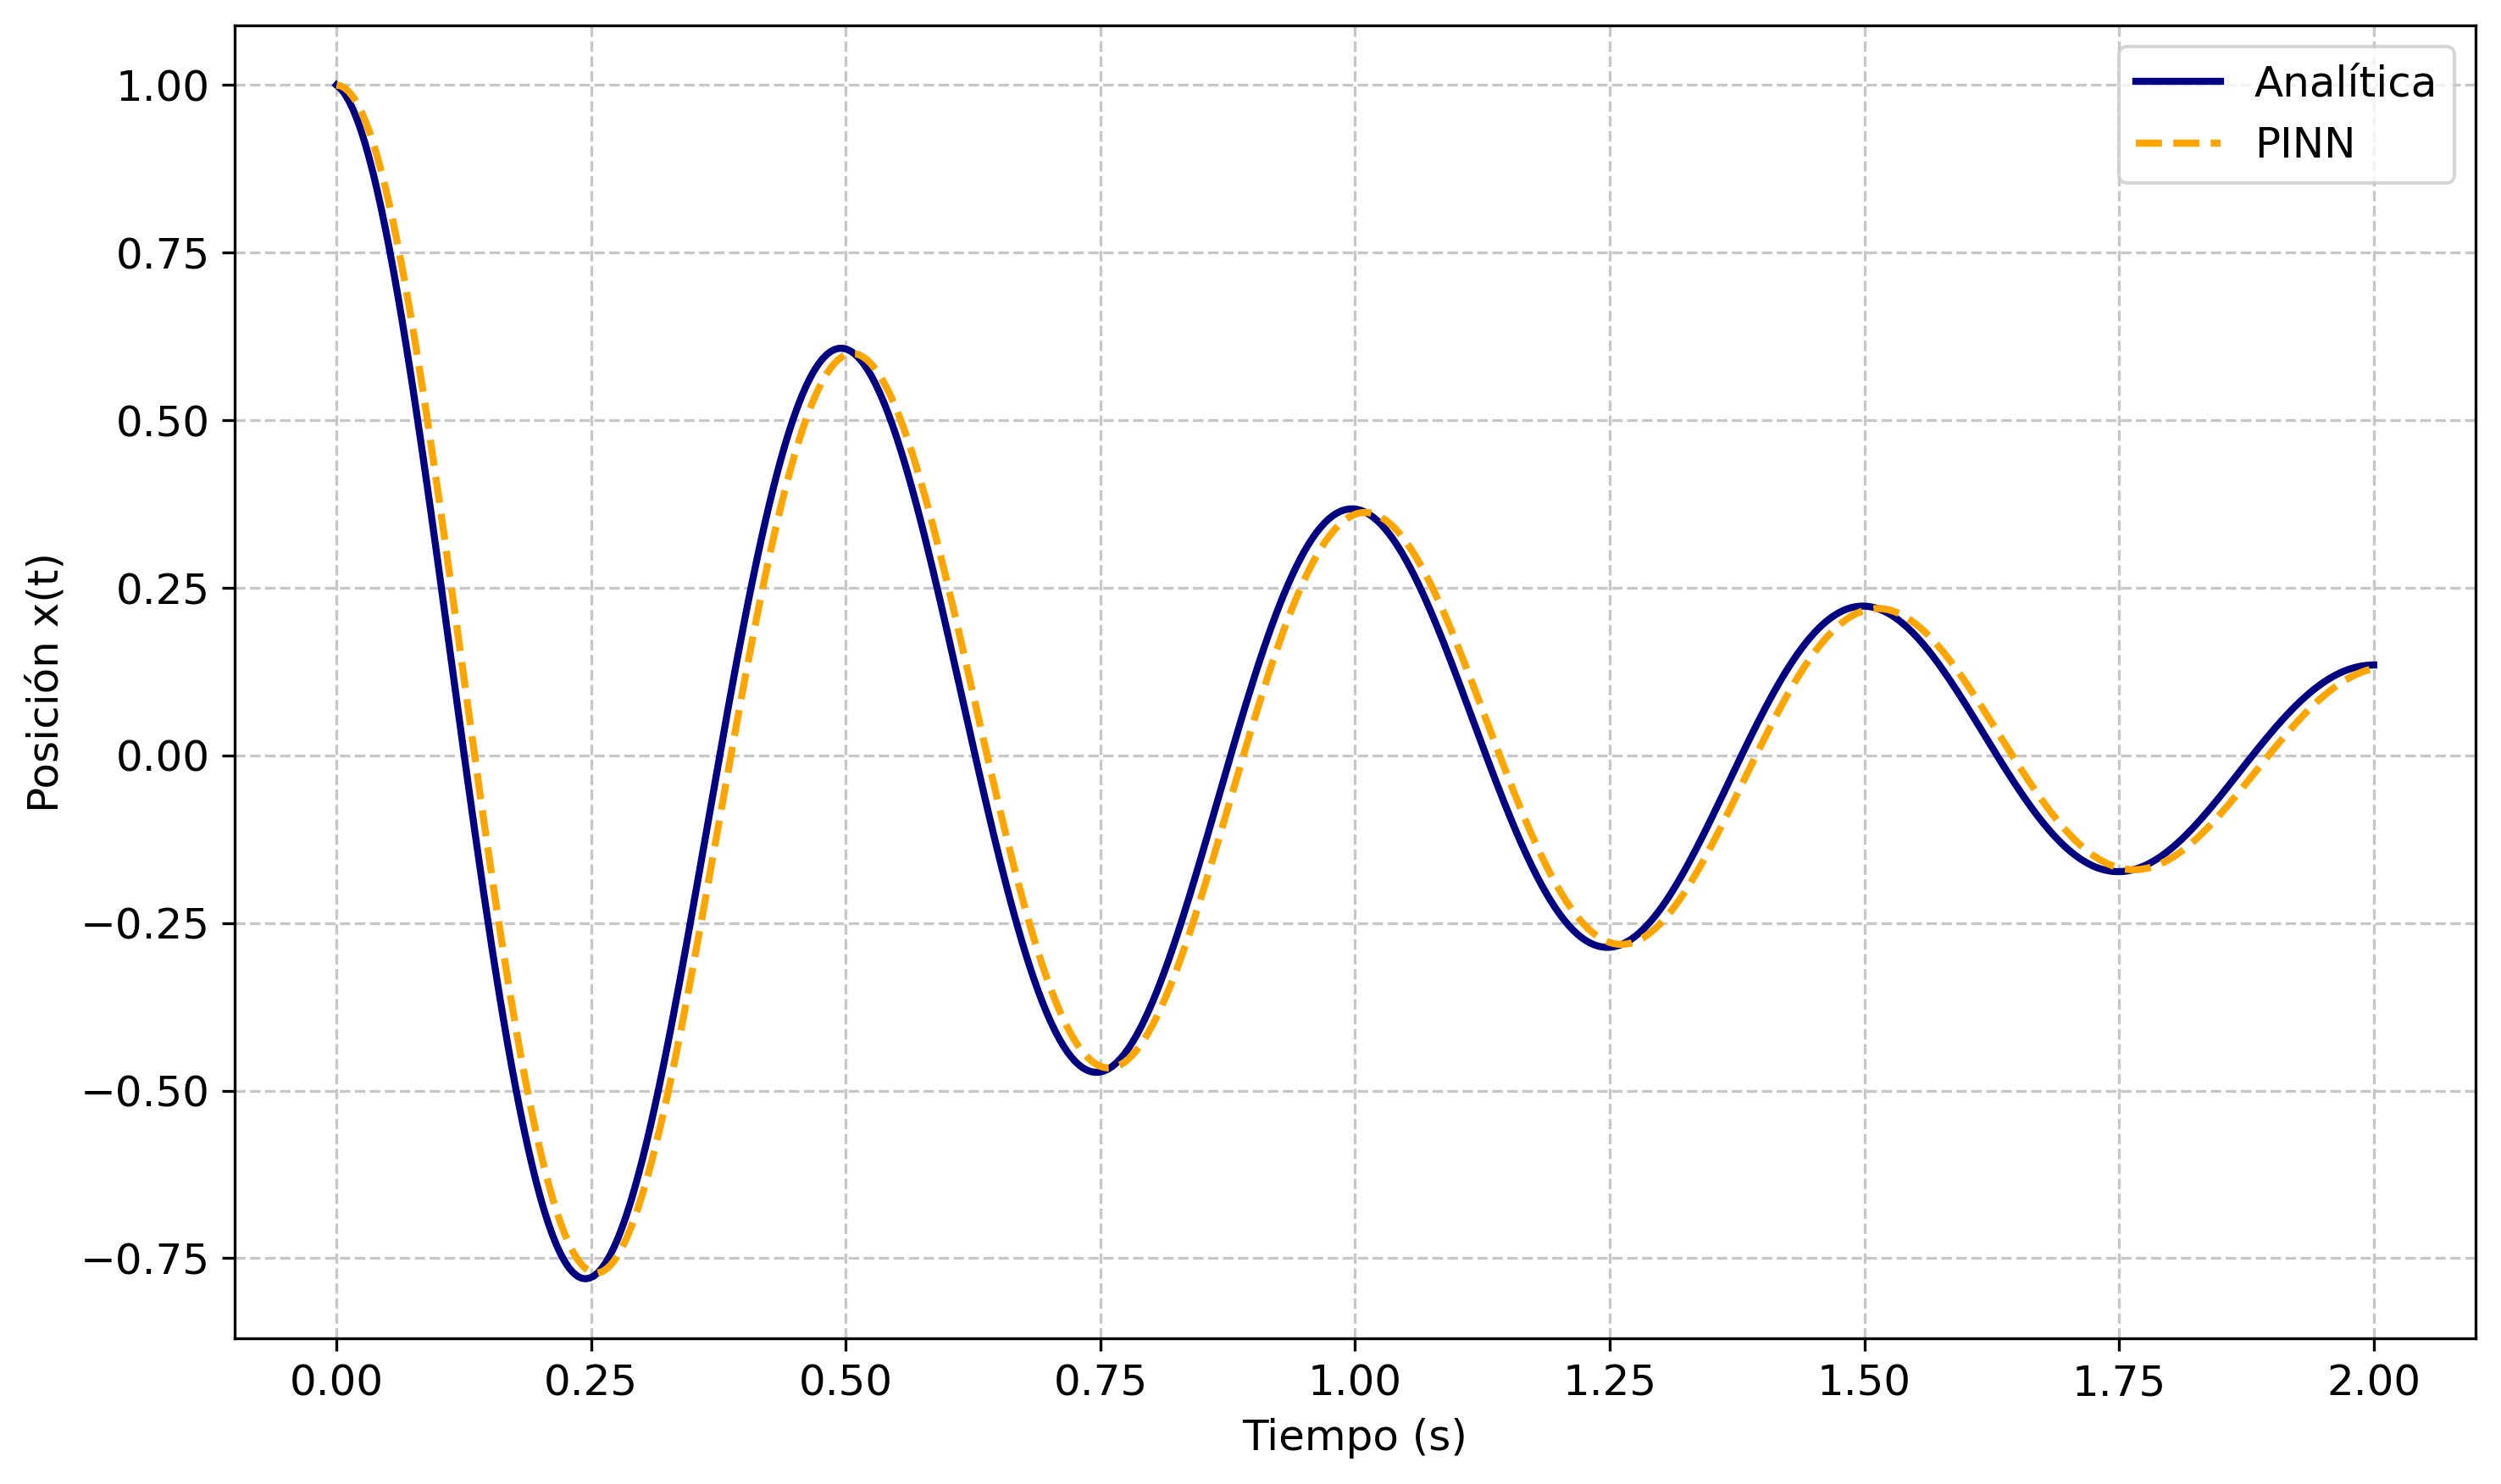

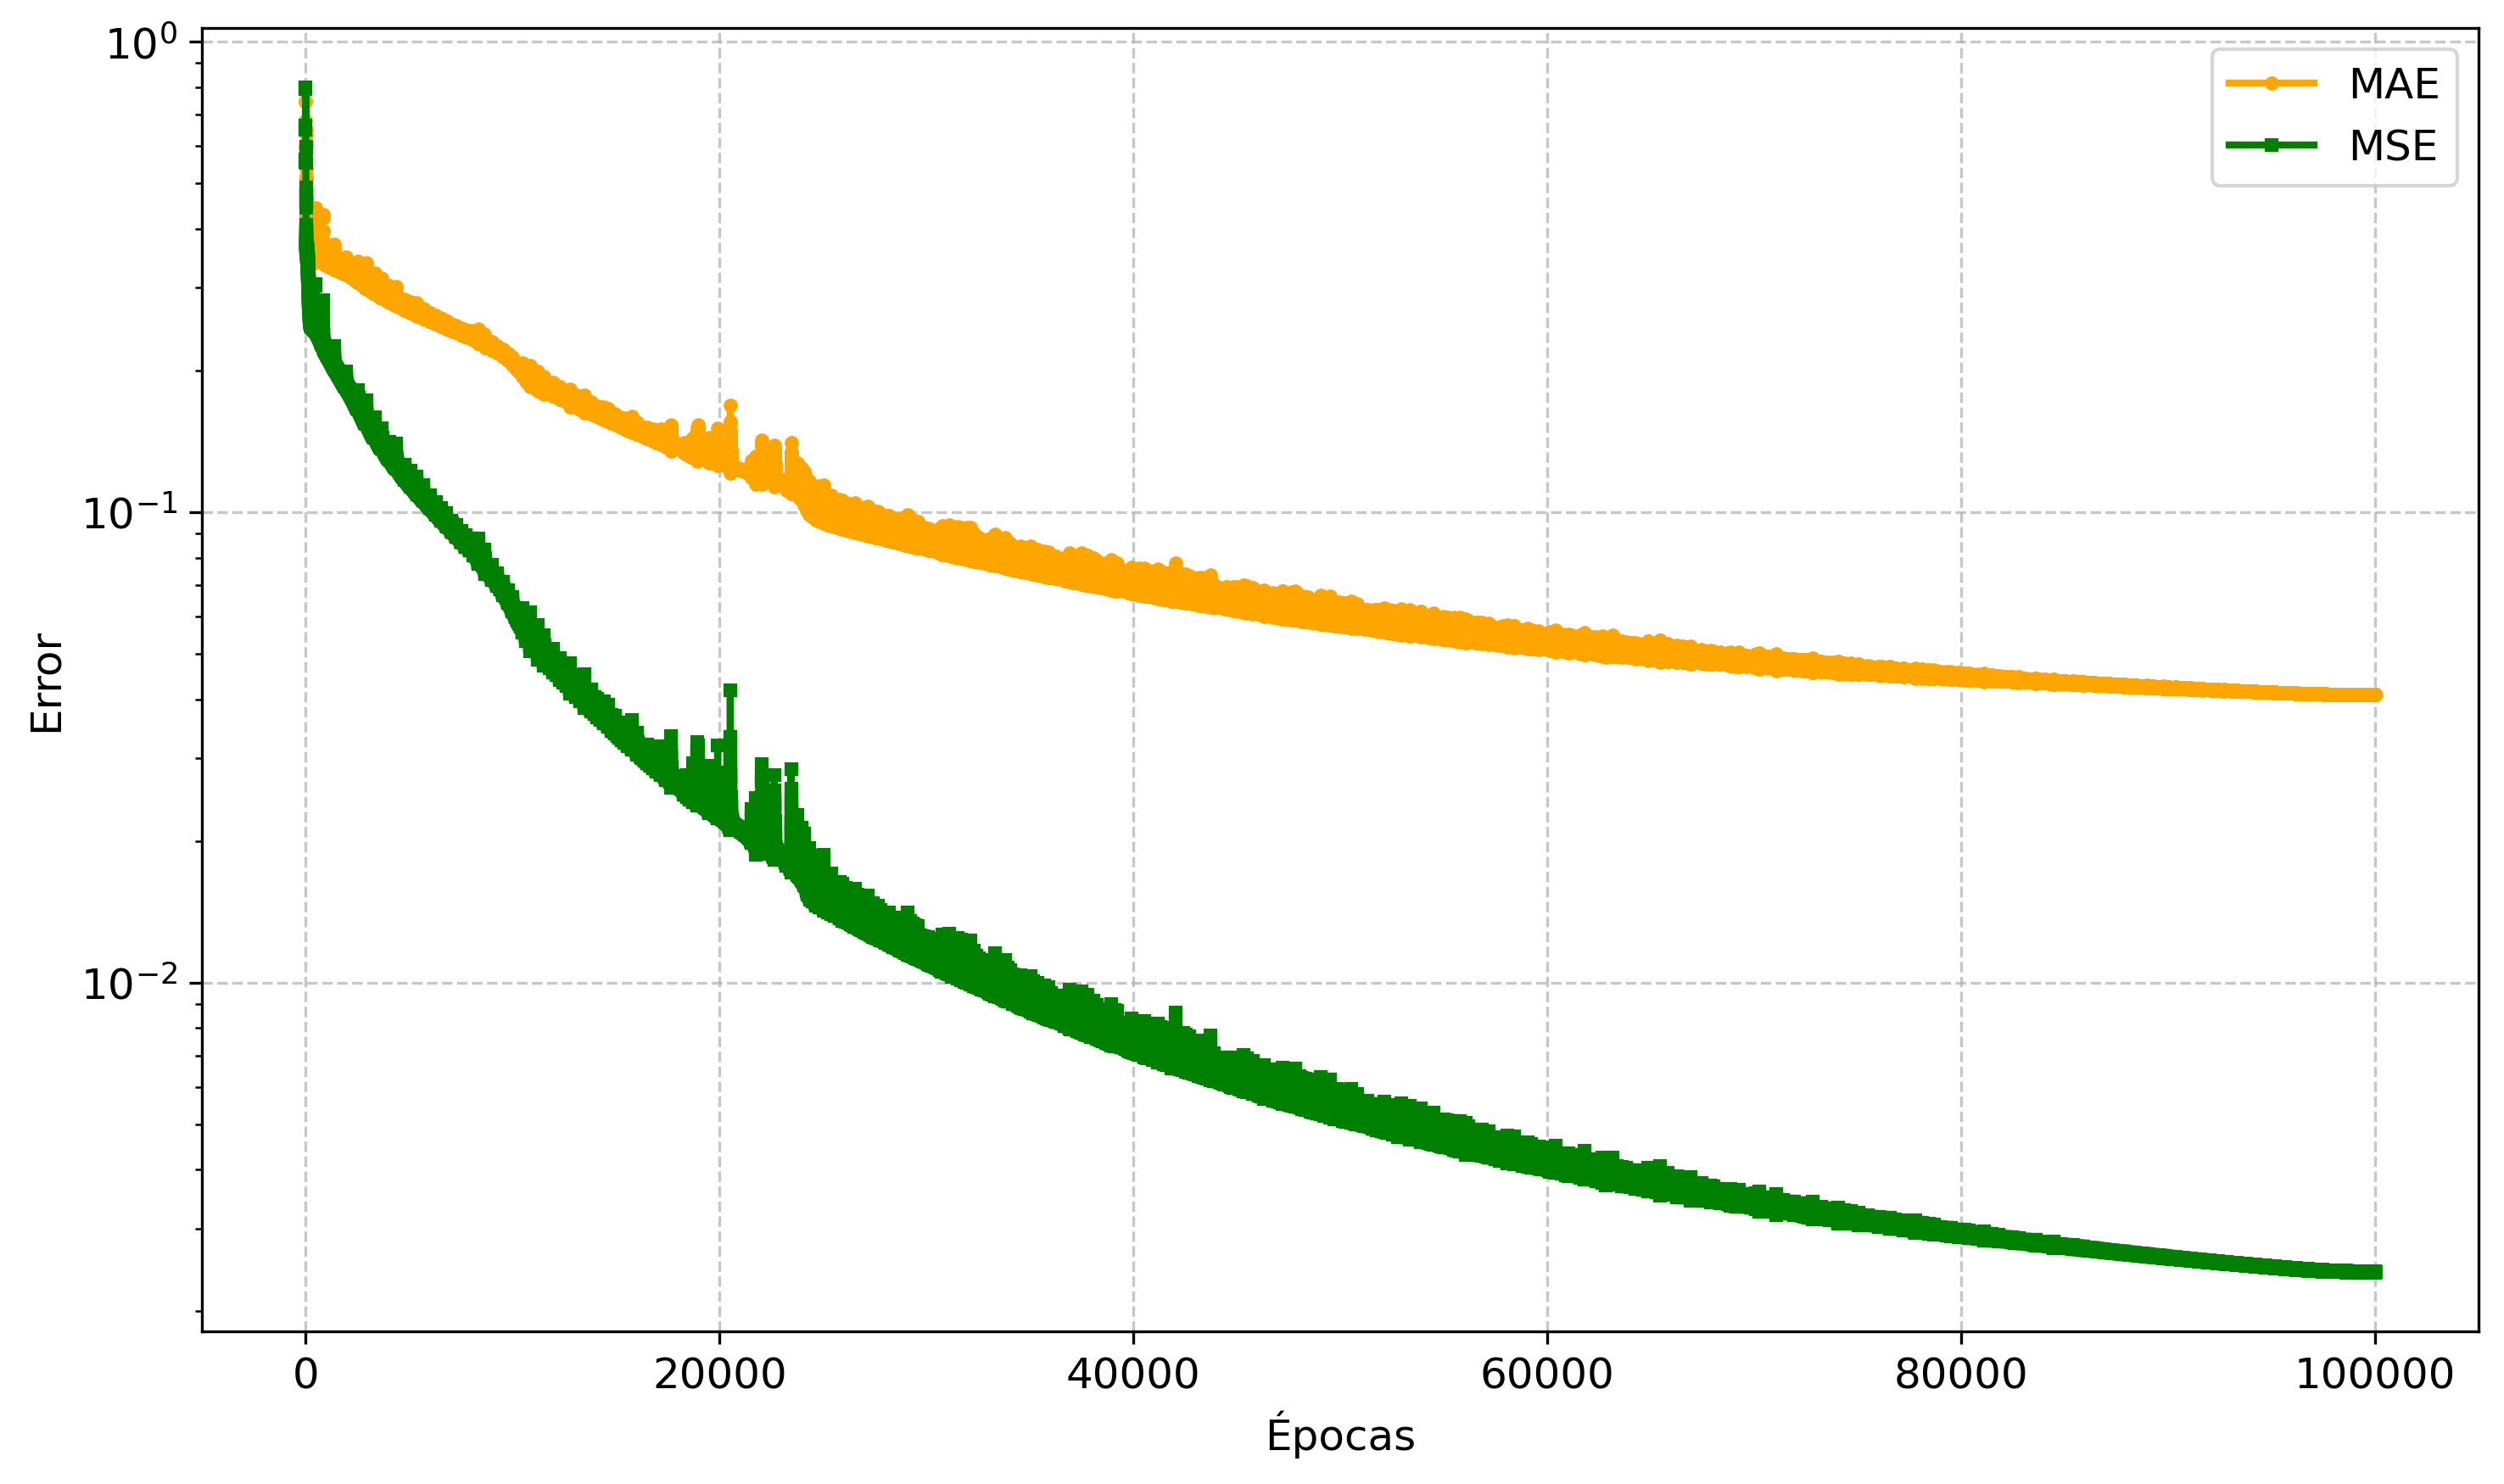

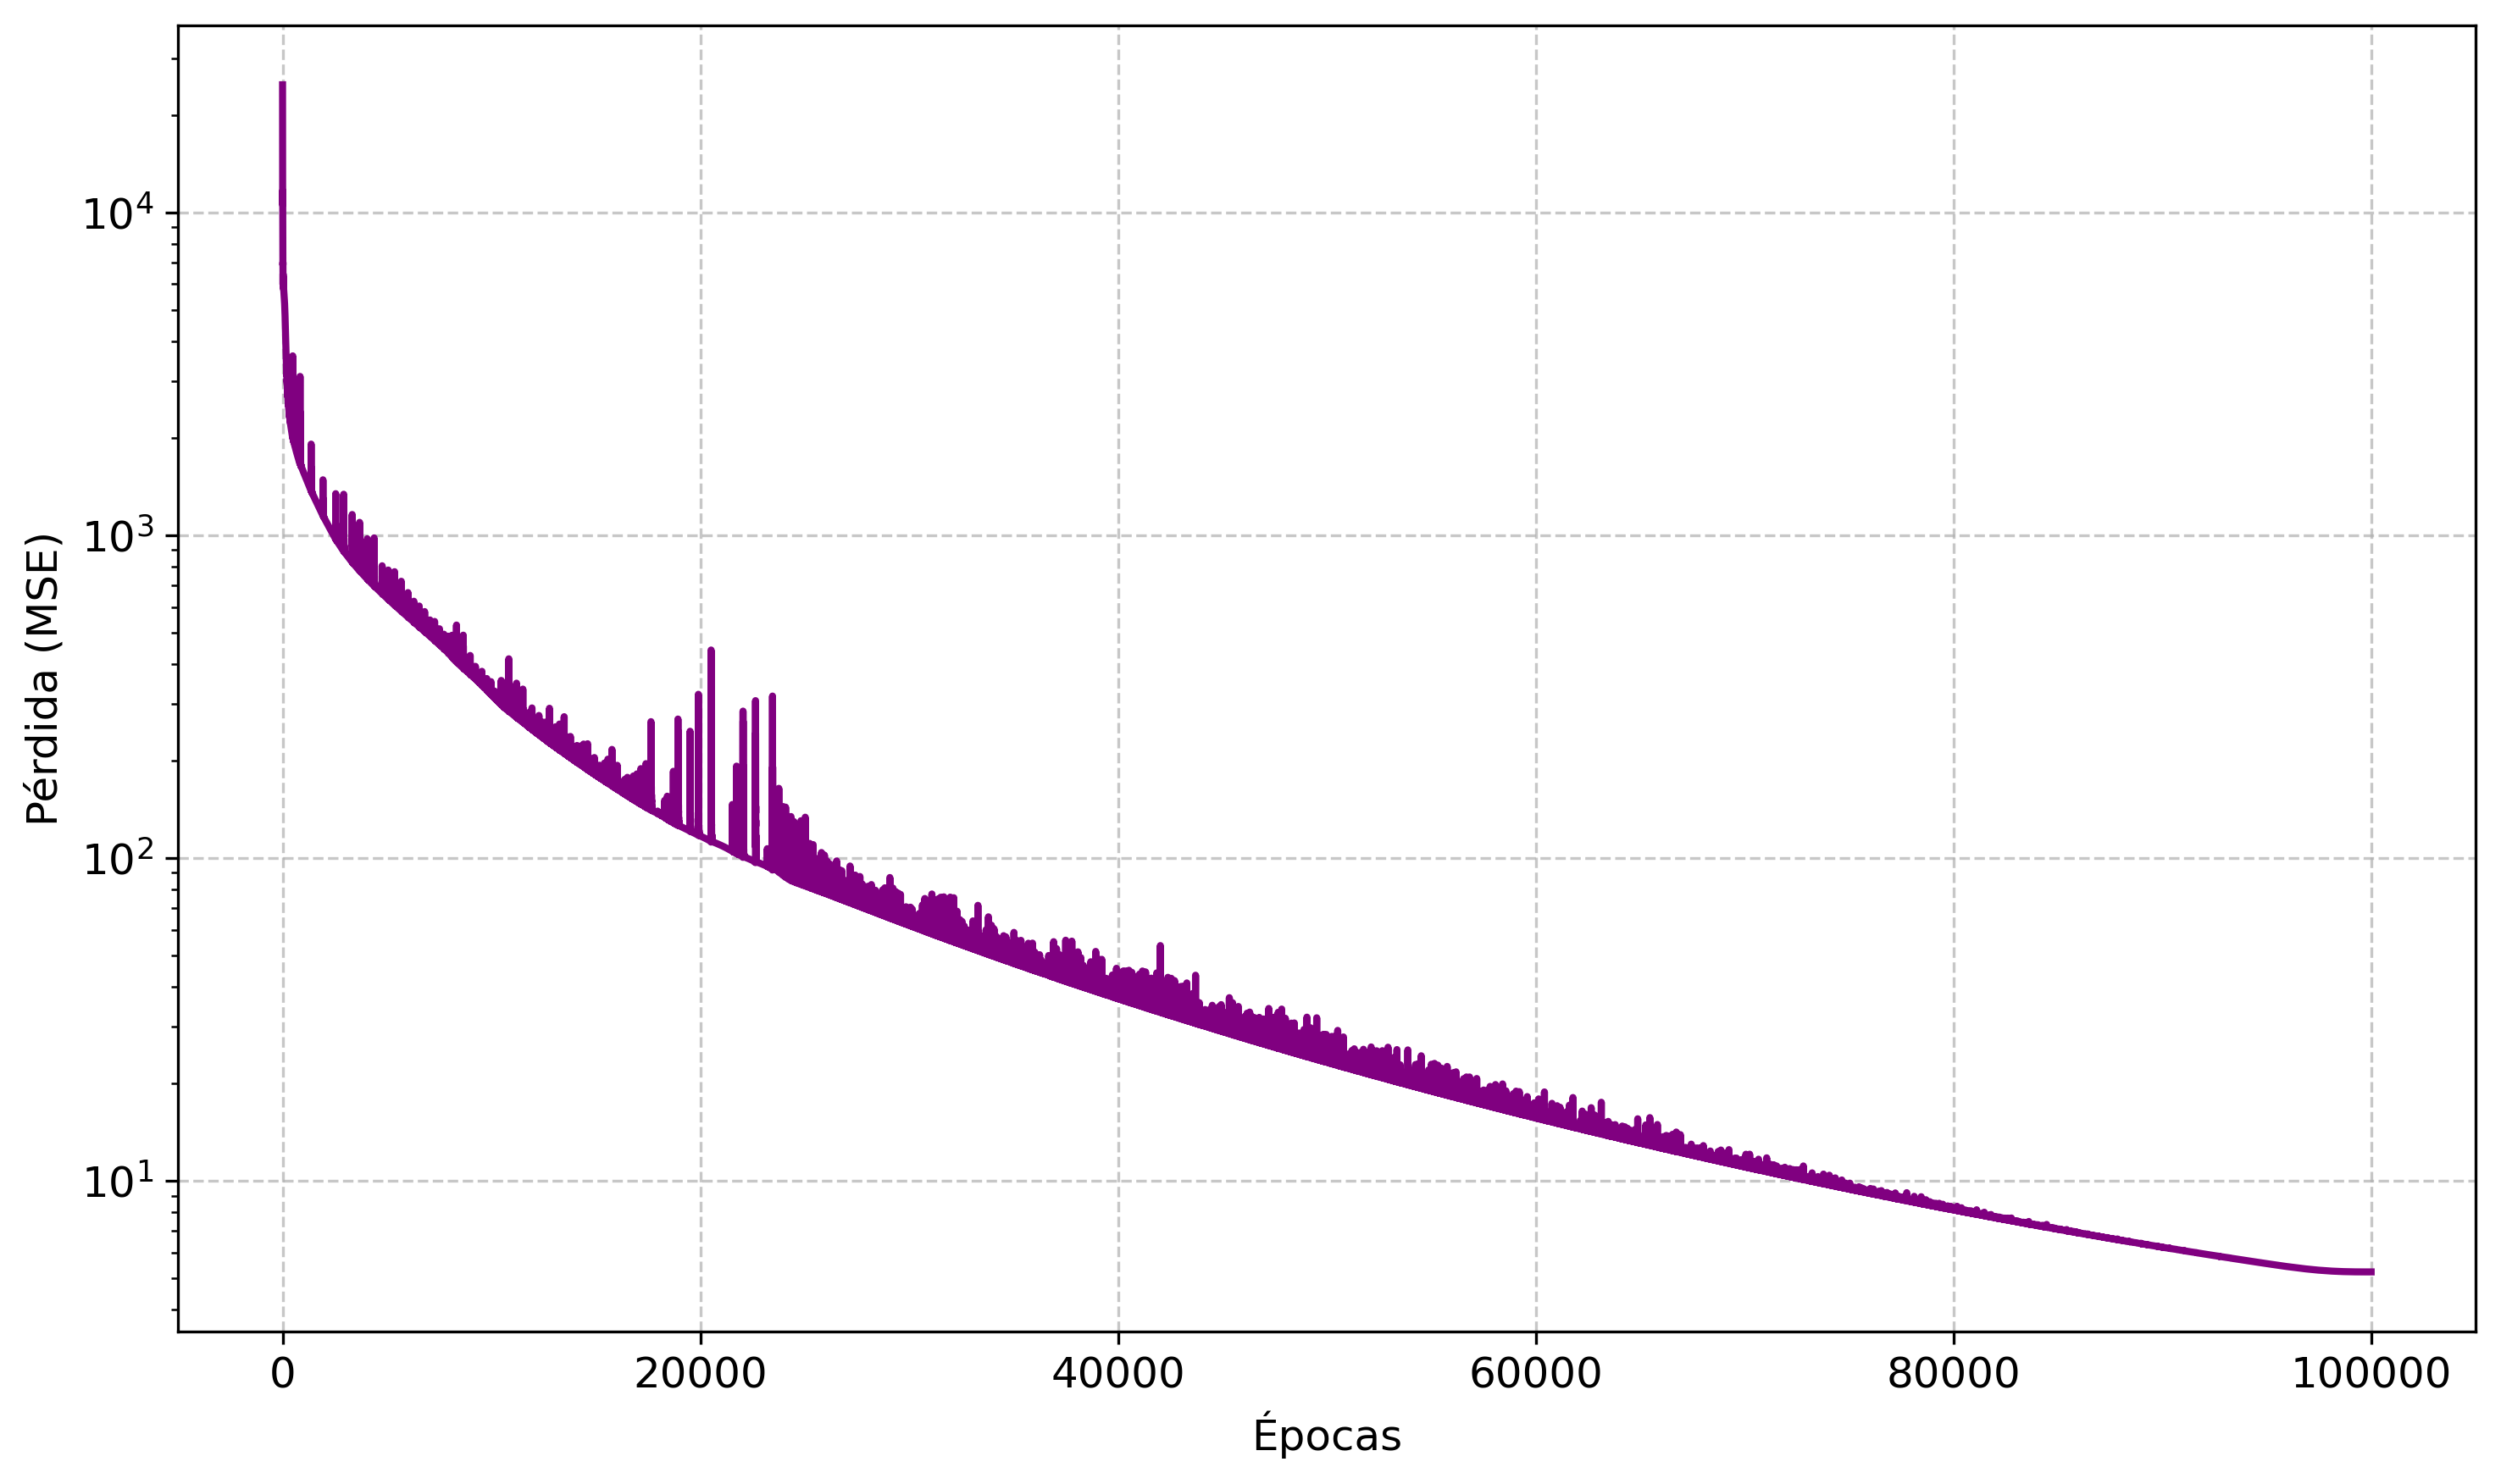

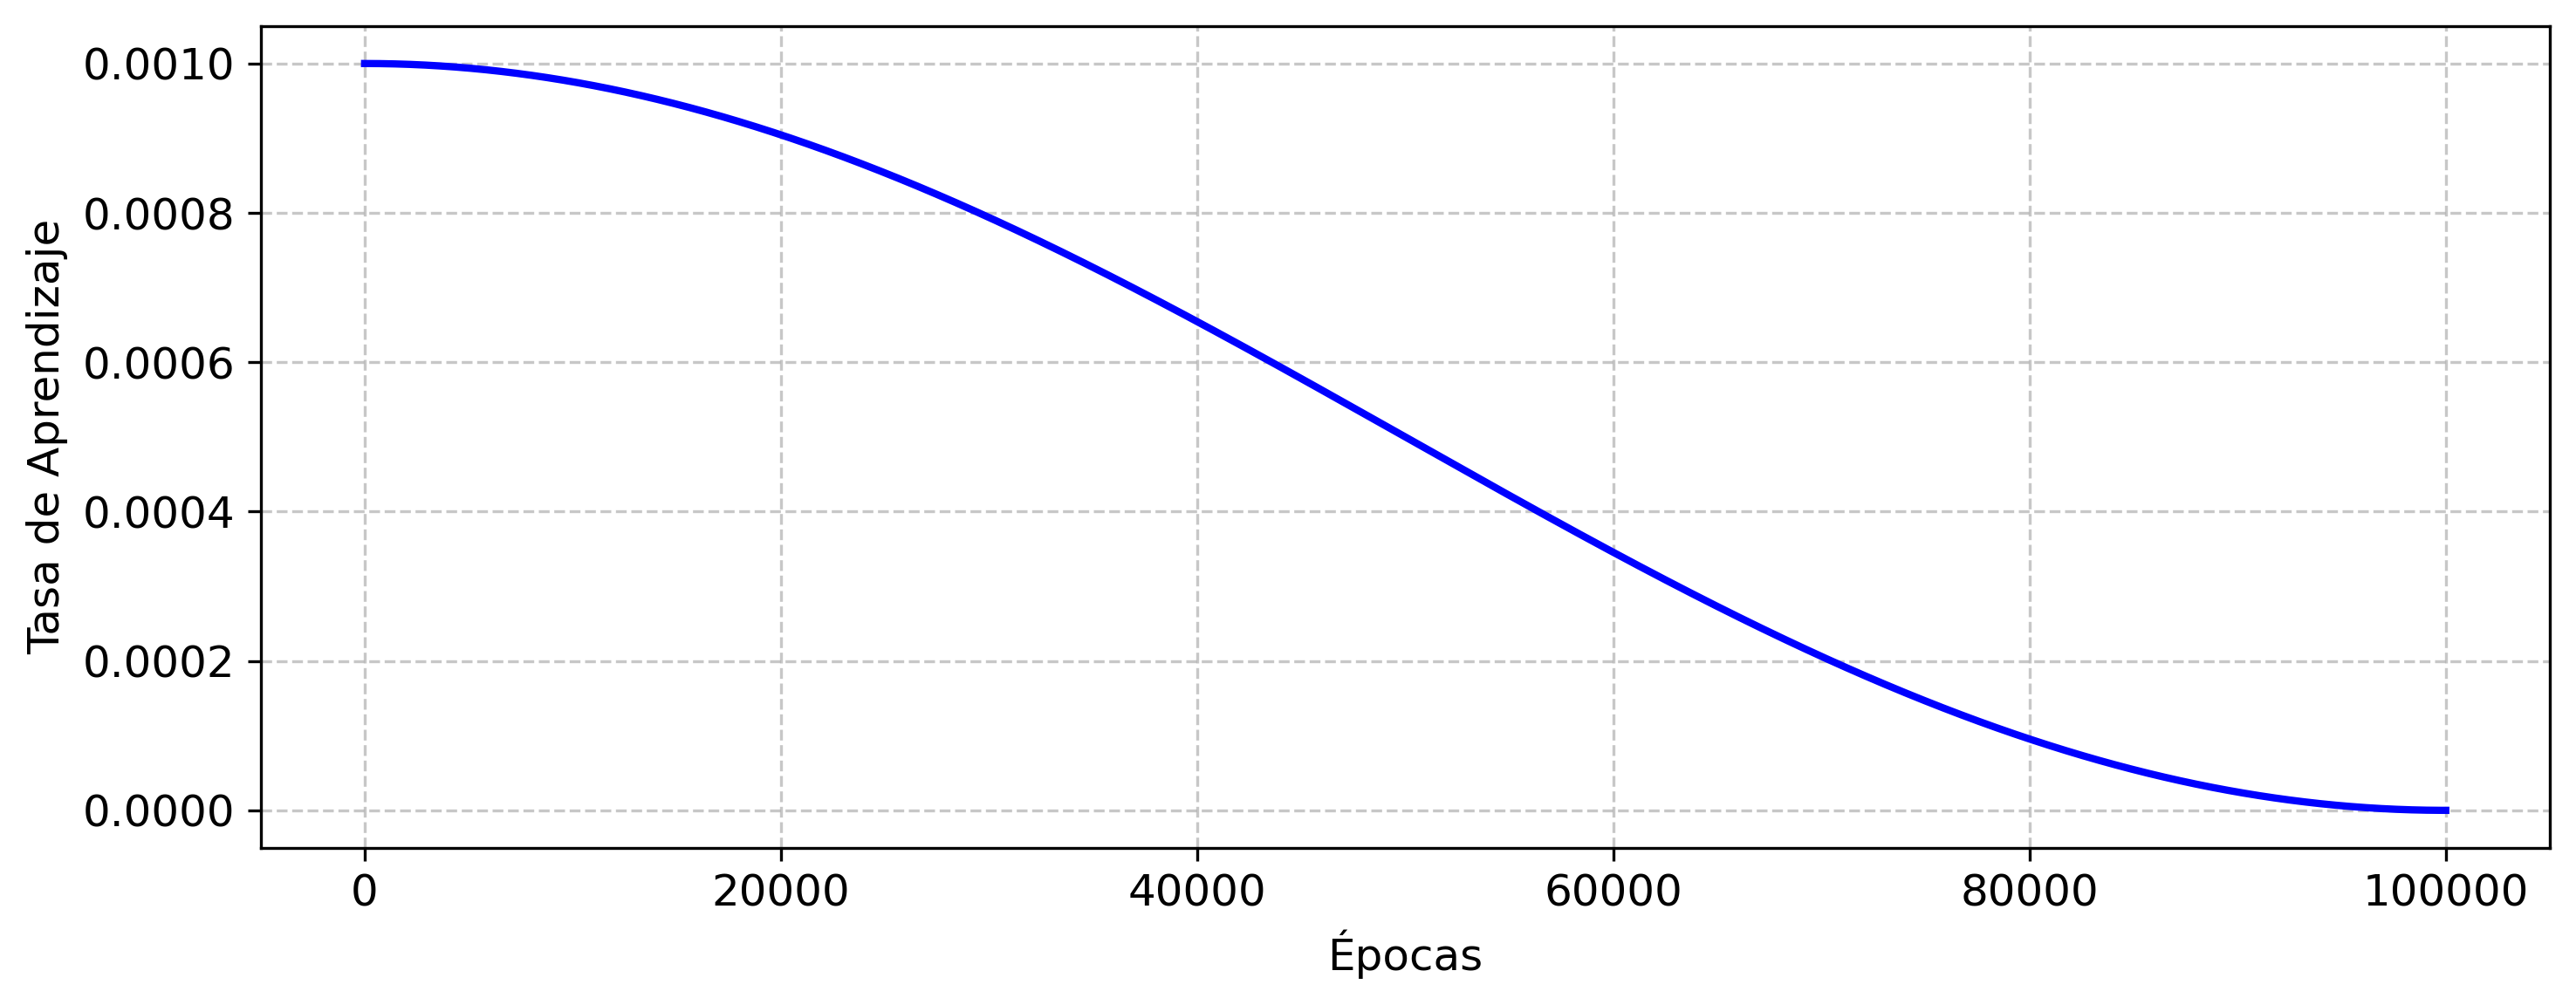

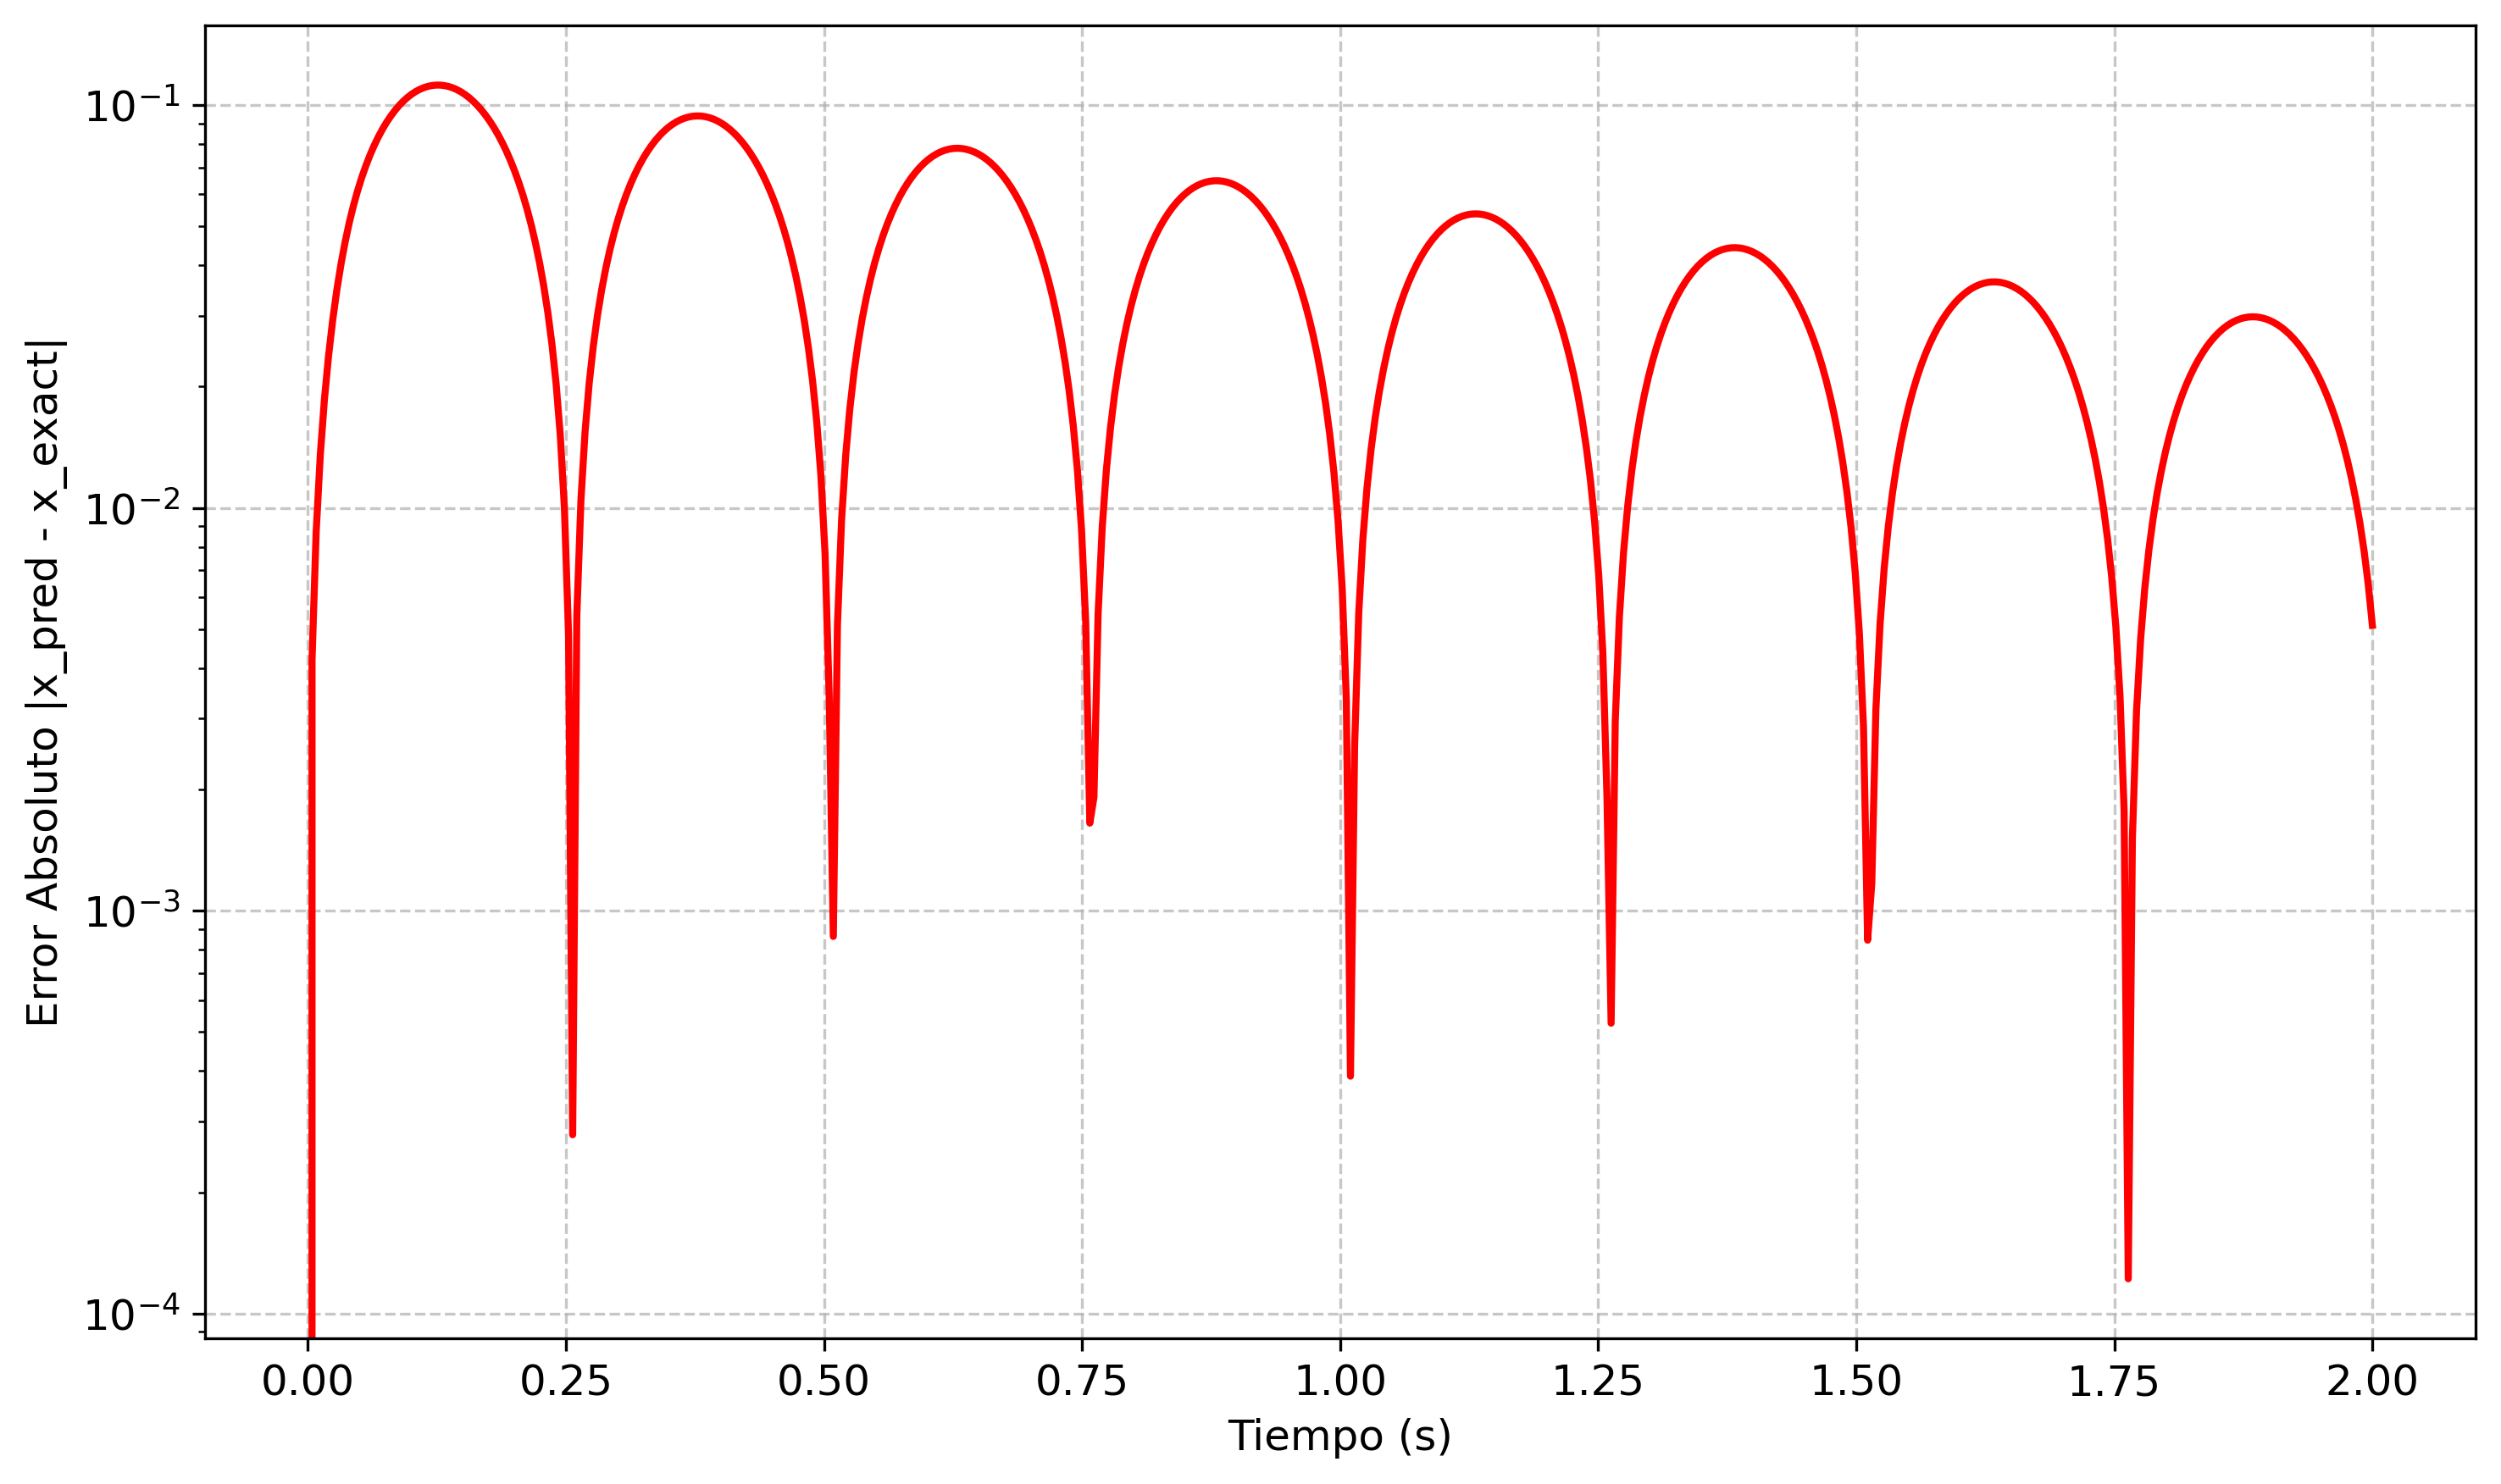

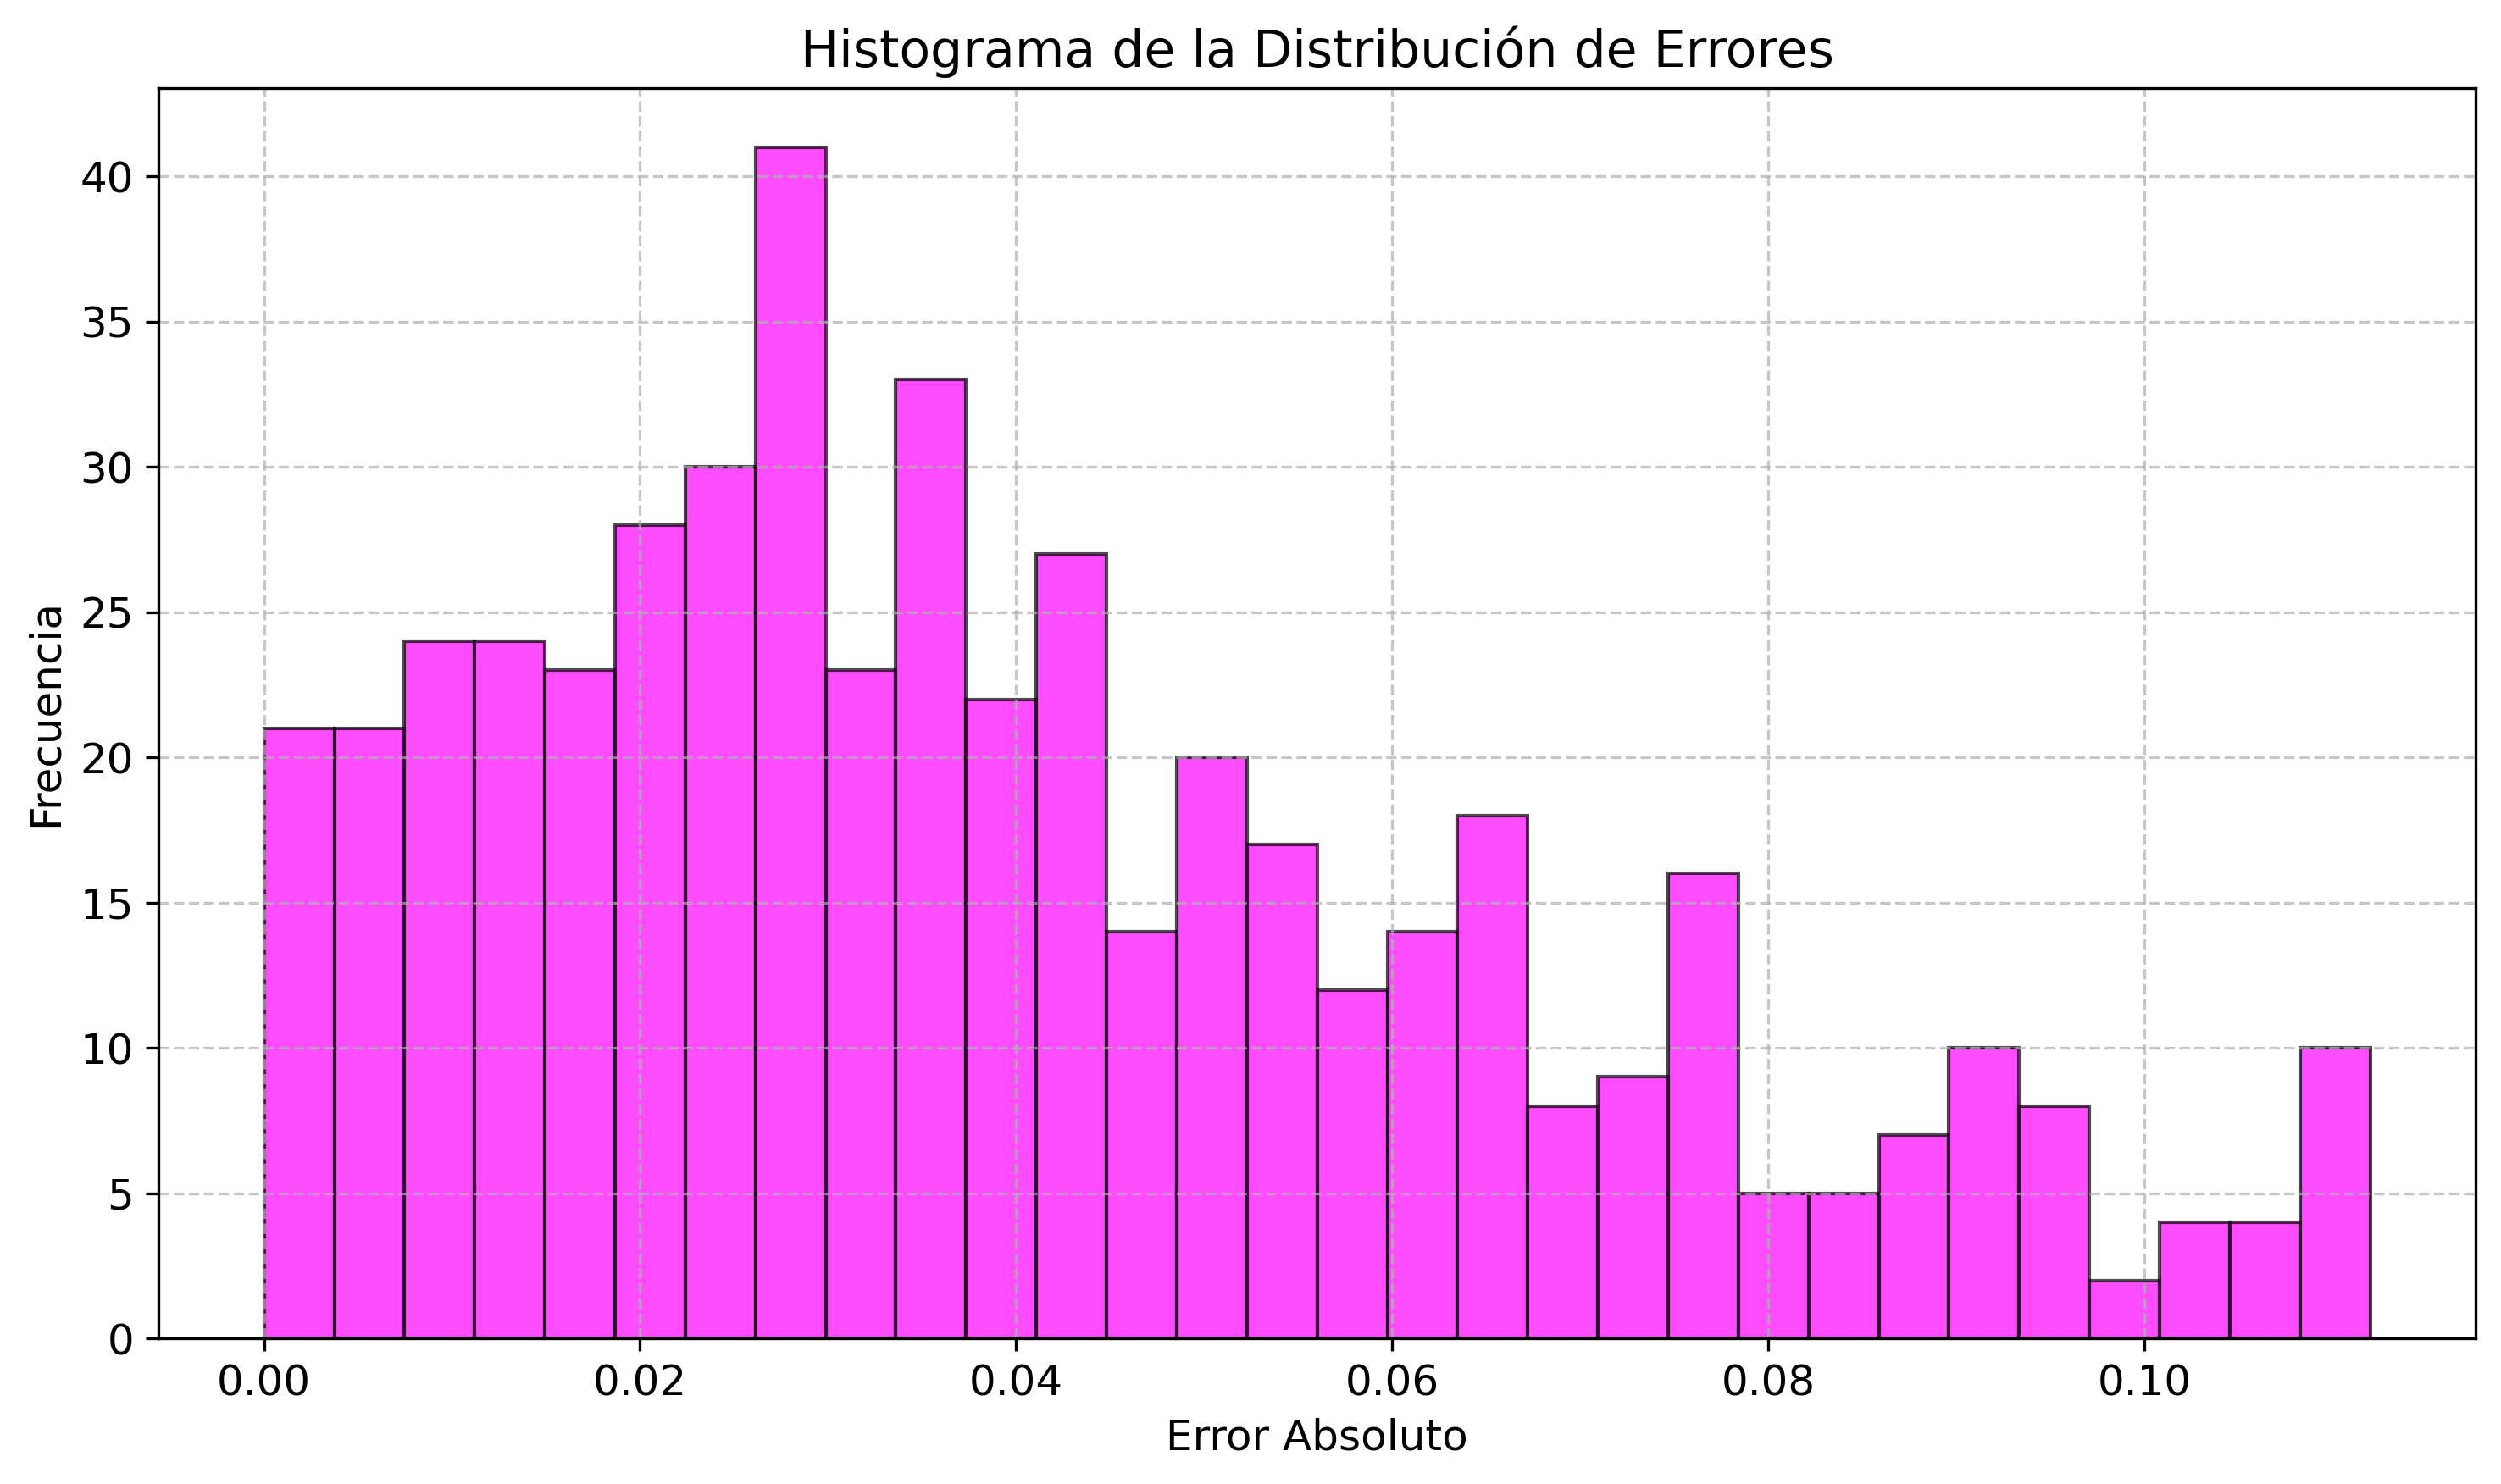


=== INFORME DE RESULTADOS ===
Tiempo de entrenamiento: 2116.62 segundos
Modelo adecuado para la ecuación: ✗ No

Tabla de errores finales:
           Métrica  Valor Final  Promedio (últimas 100 épocas)
               MAE     0.040936                       0.040936
               MSE     0.002427                       0.002427
Error Máx Absoluto     0.112024                       0.112024

Criterios de aceptación:
- MAE: ✗ (límite: 1.00e-03, obtenido: 4.09e-02)
- MSE: ✗ (límite: 1.00e-04, obtenido: 2.43e-03)
- Error Máx Absoluto: ✗ (límite: 1.00e-03, obtenido: 1.12e-01)

Tabla de convergencia numérica:
 Época      Pérdida          MAE          MSE    Error Máx
     1 2.487978e+04 6.446806e-01 6.499423e-01 1.777275e+00
   101 5.185017e+03 3.967597e-01 3.393110e-01 1.672994e+00
   501 2.241015e+03 3.552653e-01 2.501694e-01 1.417942e+00
  1001 1.571032e+03 3.352427e-01 2.190118e-01 1.311515e+00
  2001 1.129609e+03 3.199764e-01 1.841645e-01 1.149462e+00
100000 5.223941e+00 4.093641e-02 2.42

In [12]:
# =====================================================
# Importación de librerías y configuración inicial
# =====================================================
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm
import os

# =====================================================
# CONFIGURACIÓN: Dispositivo de cómputo (GPU si está disponible)
# =====================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# =====================================================
# CREAR DIRECTORIO PARA RESULTADOS
# =====================================================
output_dir = "resultados_pinn_modular"
os.makedirs(output_dir, exist_ok=True)

# =====================================================
# CONFIGURACIÓN DEL PROBLEMA (EQUACIÓN DIFERENCIAL)
# =====================================================
# Se definen parámetros del oscilador amortiguado.
x0 = 1.0         # Condición inicial: posición en t=0
w0 = 4 * np.pi   # Frecuencia natural
xi = 2           # Coeficiente de amortiguamiento

# Cálculo de la frecuencia del oscilador amortiguado subcrítico.
w = torch.sqrt(torch.tensor(w0**2 - xi**2 / 4, dtype=torch.float32)).to(device)

# Intervalo temporal para la solución.
t_max = 2.0

# =====================================================
# SOLUCIÓN ANALÍTICA (Función de referencia)
# =====================================================
def analytic_solution(t):
    """
    Calcula la solución exacta del oscilador amortiguado subcrítico:
       x(t) = x0 * exp(-xi*t/2) * cos(w*t)

    Parámetros:
        t (torch.Tensor): Tiempo.
    Retorna:
        torch.Tensor: Solución analítica evaluada en t.
    """
    return x0 * torch.exp(-0.5 * xi * t) * torch.cos(w * t)

# =====================================================
# DEFINICIÓN DE LA ECUACIÓN DIFERENCIAL A RESOLVER
# =====================================================
def differential_equation(x, dx_dt, d2x_dt2, t):
    """
    Define el residuo de la ecuación diferencial que se desea minimizar.
    Para el oscilador amortiguado:
         x'' + xi*x' + w^2 * x = 0
    Este formato modular permite sustituir la ecuación por otra simplemente
    modificando esta función.

    Parámetros:
        x (torch.Tensor): Valor de la solución x(t).
        dx_dt (torch.Tensor): Primera derivada de x respecto a t.
        d2x_dt2 (torch.Tensor): Segunda derivada de x respecto a t.
        t (torch.Tensor): Tiempo.

    Retorna:
        torch.Tensor: Residual de la ED evaluado en t.
    """
    return d2x_dt2 + xi * dx_dt + (w**2) * x

# =====================================================
# ARQUITECTURA DE LA RED NEURONAL (PINN)
# =====================================================
def architecture():
    """
    Define la red neuronal con activación Tanh.
    La solución se expresa como:
         x_trial(t) = x0 + t^2 * N(t)
    Esto garantiza que la condición inicial se cumpla: x(0)=x0.

    Retorna:
        nn.Sequential: Modelo de red neuronal.
    """
    model = nn.Sequential(
        nn.Linear(1, 64), nn.Tanh(),
        nn.Linear(64, 256), nn.Tanh(),
        nn.Linear(256, 64), nn.Tanh(),
        nn.Linear(64, 1, bias=False)
    )
    return model.to(device)

# Inicialización de la red neuronal
model = architecture()

# =====================================================
# SOLUCIÓN DE PRUEBA (TRIAL SOLUTION)
# =====================================================
def trial_solution(t, model):
    """
    Define la solución de prueba que satisface la condición inicial: x(0)=x0.
    Se formula como: x_trial(t) = x0 + t^2 * N(t)

    Parámetros:
        t (torch.Tensor): Tiempo.
        model (nn.Module): Red neuronal.

    Retorna:
        torch.Tensor: Solución aproximada evaluada en t.
    """
    return x0 + model(t) * (t**2)

# =====================================================
# FUNCIÓN DE PÉRDIDA
# =====================================================
def compute_loss(t, model):
    """
    Calcula el error cuadrático medio del residuo de la ED.
    Se evalúa:
         residual = x''(t) + xi*x'(t) + w^2*x(t)

    Parámetros:
        t (torch.Tensor): Puntos de tiempo de entrenamiento.
        model (nn.Module): Modelo PINN.

    Retorna:
        torch.Tensor: Pérdida calculada.
    """
    # Se asegura que t requiera gradientes para la diferenciación automática.
    t.requires_grad_(True)

    # Se evalúa la solución de prueba.
    x = trial_solution(t, model)

    # Se calcula la primera derivada con respecto a t.
    dx_dt = torch.autograd.grad(x, t, torch.ones_like(t), create_graph=True)[0]

    # Se calcula la segunda derivada con respecto a t.
    d2x_dt2 = torch.autograd.grad(dx_dt, t, torch.ones_like(t), create_graph=True)[0]

    # Se obtiene el residual de la ecuación diferencial.
    residual = differential_equation(x, dx_dt, d2x_dt2, t)

    # La pérdida es la media del cuadrado del residual.
    return torch.mean(residual**2)

# =====================================================
# CONFIGURACIÓN DEL ENTRENAMIENTO
# =====================================================
# Semillas para reproducibilidad.
torch.manual_seed(42)
np.random.seed(42)

n_points = 500        # Número de puntos de colocación (collocation points)
epochs = 100000       # Número total de épocas
learning_rate = 1e-3  # Tasa de aprendizaje inicial
print_freq = 1000     # Frecuencia para imprimir resultados

# Definir los puntos de entrenamiento en el intervalo [0, t_max]
t_train = torch.linspace(0, t_max, n_points).reshape(-1, 1).to(device)

# Definir el optimizador y el scheduler para ajustar la tasa de aprendizaje
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# Listas para almacenar la evolución de las métricas durante el entrenamiento.
loss_history = []
mae_history = []
mse_history = []
max_abs_error_history = []
lr_history = []

# =====================================================
# FUNCION DE EVALUACIÓN DEL MODELO
# =====================================================
def evaluate_model(model, t_eval):
    """
    Evalúa el modelo en una malla fina de puntos (t_eval) y calcula:
      - MAE: Error medio absoluto.
      - MSE: Error cuadrático medio.
      - Error máximo absoluto.

    Parámetros:
        model (nn.Module): Modelo entrenado.
        t_eval (torch.Tensor): Puntos de evaluación.

    Retorna:
        tuple: (Predicción, Solución exacta, MAE, MSE, Error máximo absoluto)
    """
    model.eval()  # Se coloca el modelo en modo evaluación
    with torch.no_grad():
        P_exact = analytic_solution(t_eval)
        P_pred = trial_solution(t_eval, model)
        mae = torch.mean(torch.abs(P_pred - P_exact)).item()
        mse = torch.mean((P_pred - P_exact)**2).item()
        max_abs_error = torch.max(torch.abs(P_pred - P_exact)).item()
    model.train()  # Se regresa el modelo a modo entrenamiento
    return P_pred, P_exact, mae, mse, max_abs_error

# =====================================================
# ENTRENAMIENTO DEL MODELO
# =====================================================
print("\n===== INICIANDO ENTRENAMIENTO =====")
print(f"Oscilador amortiguado: x'' + {xi}*x' + {w.item():.4f}^2*x = 0")
print(f"Condición inicial: x(0) = {x0}")
print(f"Épocas: {epochs}, Puntos de entrenamiento: {n_points}")
print("====================================\n")

start_time = time.time()

# Se define una malla fina para la evaluación continua
t_fine = torch.linspace(0, t_max, 500).reshape(-1, 1).to(device)

# Bucle de entrenamiento con barra de progreso
for epoch in tqdm(range(epochs), desc="Entrenamiento"):
    optimizer.zero_grad()                   # Reinicia los gradientes
    loss_val = compute_loss(t_train, model)   # Calcula la pérdida en los puntos de entrenamiento
    loss_val.backward()                     # Retropropagación para calcular los gradientes
    optimizer.step()                        # Actualización de los parámetros
    scheduler.step()                        # Actualización de la tasa de aprendizaje

    # Almacena la tasa de aprendizaje actual
    lr_history.append(optimizer.param_groups[0]['lr'])

    # Evaluación del modelo en la malla fina para obtener métricas de error
    _, _, mae, mse, max_abs_error = evaluate_model(model, t_fine)

    # Se registran las métricas en cada época
    loss_history.append(loss_val.item())
    mae_history.append(mae)
    mse_history.append(mse)
    max_abs_error_history.append(max_abs_error)

    # Impresión de resultados cada 'print_freq' épocas
    if (epoch + 1) % print_freq == 0 or epoch == 0:
        print(f"Época {epoch+1}/{epochs} - Pérdida: {loss_val.item():.6e}, MAE: {mae:.6e}, MSE: {mse:.6e}, Error Máx: {max_abs_error:.6e}")

elapsed_time = time.time() - start_time
print(f"\nTiempo total de entrenamiento: {elapsed_time:.2f} segundos")

# =====================================================
# EVALUACIÓN FINAL DEL MODELO
# =====================================================
P_pred, P_exact, final_mae, final_mse, final_max_abs_error = evaluate_model(model, t_fine)

# Convertir tensores a arrays para graficar (se traslada a CPU si es necesario)
t_np = t_fine.cpu().detach().numpy()
P_exact_np = P_exact.cpu().detach().numpy()
P_pred_np = P_pred.cpu().detach().numpy()

# =====================================================
# TABLA DE ERRORES FINALES
# =====================================================
error_table = pd.DataFrame({
    "Métrica": ["MAE", "MSE", "Error Máx Absoluto"],
    "Valor Final": [final_mae, final_mse, final_max_abs_error],
    "Promedio (últimas 100 épocas)": [
        np.mean(mae_history[-100:]),
        np.mean(mse_history[-100:]),
        np.mean(max_abs_error_history[-100:])
    ]
})

# Criterios de aceptación (pueden ajustarse según la aplicación)
ACCEPTANCE_CRITERIA = {
    "MAE": 1e-3,
    "MSE": 1e-4,
    "Error Máx Absoluto": 1e-3
}

# Se determina si el modelo cumple con los criterios
model_adequate = all([
    error_table["Promedio (últimas 100 épocas)"][i] < val
    for i, val in enumerate([ACCEPTANCE_CRITERIA["MAE"],
                             ACCEPTANCE_CRITERIA["MSE"],
                             ACCEPTANCE_CRITERIA["Error Máx Absoluto"]])
])

# =====================================================
# TABLA DE CONVERGENCIA NUMÉRICA
# =====================================================
# Se seleccionan épocas específicas para mostrar la evolución de las métricas
convergence_epochs = [0, 100, 500, 1000, 2000, epochs - 1]
convergence_table = pd.DataFrame({
    "Época": [e + 1 for e in convergence_epochs],
    "Pérdida": [loss_history[e] for e in convergence_epochs],
    "MAE": [mae_history[e] for e in convergence_epochs],
    "MSE": [mse_history[e] for e in convergence_epochs],
    "Error Máx": [max_abs_error_history[e] for e in convergence_epochs]
})

# =====================================================
# GRÁFICAS DE ALTA RESOLUCIÓN
# =====================================================
plt.rcParams.update({'font.size': 12})

# Gráfica 1: Solución Predicha vs. Solución Analítica
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t_np, P_exact_np, label="Analítica", color="navy", lw=2)
plt.plot(t_np, P_pred_np, '--', label="PINN", color="orange", lw=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición x(t)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/solucion_comparacion.png", bbox_inches="tight")
plt.show()
plt.close()

# Gráfica 2: Evolución de MAE y MSE (escala logarítmica)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(mae_history, label="MAE", color="orange", lw=2, marker='o', markersize=3)
plt.plot(mse_history, label="MSE", color="green", lw=2, marker='s', markersize=3)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/mae_mse_evolucion.png", bbox_inches="tight")
plt.show()
plt.close()

# Gráfica 3: Convergencia de la Pérdida (escala logarítmica)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(loss_history, color="purple", lw=2)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/convergencia_perdida.png", bbox_inches="tight")
plt.show()
plt.close()

# Gráfica 4: Evolución de la Tasa de Aprendizaje
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(lr_history, color="blue", lw=2)
plt.xlabel("Épocas")
plt.ylabel("Tasa de Aprendizaje")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/tasa_aprendizaje.png", bbox_inches="tight")
plt.show()
plt.close()

# Gráfica 5: Distribución del Error Absoluto en el Dominio
error_vs_time = np.abs(P_pred_np - P_exact_np)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t_np, error_vs_time, color="red", lw=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Error Absoluto |x_pred - x_exact|")
plt.yscale("log")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/error_distribucion.png", bbox_inches="tight")
plt.show()
plt.close()

# Gráfica 6: Histograma de la Distribución de Errores
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(error_vs_time, bins=30, color="magenta", alpha=0.7, edgecolor="black")
plt.xlabel("Error Absoluto")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Distribución de Errores")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/histograma_errores.png", bbox_inches="tight")
plt.show()
plt.close()

# =====================================================
# INFORME FINAL DE RESULTADOS
# =====================================================
print("\n" + "="*50)
print("=== INFORME DE RESULTADOS ===")
print("="*50)
print(f"Tiempo de entrenamiento: {elapsed_time:.2f} segundos")
print(f"Modelo adecuado para la ecuación: {'✓ Sí' if model_adequate else '✗ No'}\n")

print("Tabla de errores finales:")
print(error_table.to_string(index=False))
print("\nCriterios de aceptación:")
for i, (metric, value) in enumerate(ACCEPTANCE_CRITERIA.items()):
    avg_val = error_table["Promedio (últimas 100 épocas)"][i]
    print(f"- {metric}: {'✓' if avg_val < value else '✗'} (límite: {value:.2e}, obtenido: {avg_val:.2e})")

print("\nTabla de convergencia numérica:")
pd.set_option('display.float_format', '{:.6e}'.format)
print(convergence_table.to_string(index=False))
pd.reset_option('display.float_format')

print("\nLas gráficas se han guardado en el directorio:", output_dir)

# =====================================================
# GUARDAR DATOS PARA ANÁLISIS POSTERIOR
# =====================================================
convergence_data = pd.DataFrame({
    "Época": range(1, len(loss_history) + 1),
    "Pérdida": loss_history,
    "MAE": mae_history,
    "MSE": mse_history,
    "Error_Máx": max_abs_error_history,
    "Tasa_Aprendizaje": lr_history
})
convergence_data.to_csv(f"{output_dir}/convergencia_datos.csv", index=False)
